In [1]:
#### presentation p

In [2]:
import pandas as pd
import numpy as np

In [3]:
import pickle

In [4]:
with open('/data1/home/EYH/network/sev_final_1024.pkl','rb') as f:
    dd1 = pickle.load(f)

In [5]:
with open('/data1/home/EYH/network/dprp_dataset.pkl','rb') as f:
    dprp = pickle.load(f)

In [6]:
cyt_norm = dprp['norm_cyt_df']

In [7]:
all_sev_prob = dprp['all_severity']

In [8]:
ser1 = []
for i in cyt_norm.index:
    if 'CN'in i:
        ser1.append(0)
    elif all_sev_prob.loc[i,'who'] == 'moderate':
        ser1.append(1)
    elif all_sev_prob.loc[i,'who'] == 'severe':
        ser1.append(2)
    else:
        ser1.append(3)
ser1 = pd.Series(ser1,index = cyt_norm.index,name = 'label')
    

In [9]:
ser1 = ser1[ser1 !=3]

In [10]:
df = cyt_norm[cyt_norm.index.isin(ser1.index)]

In [11]:
for i in set(list(ser1)):
    print(list(ser1).count(i),i)

145 0
652 1
108 2


In [12]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df, ser1, test_size=0.2, random_state=42)


In [14]:
rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Accuracy: 0.861878453038674


In [15]:
for i in range(100, 501,50):
    rf = RandomForestClassifier(n_estimators=i, random_state=42)
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest Accuracy: {accuracy_rf}")
    print(i)

Random Forest Accuracy: 0.856353591160221
100
Random Forest Accuracy: 0.861878453038674
150
Random Forest Accuracy: 0.8729281767955801
200
Random Forest Accuracy: 0.861878453038674
250
Random Forest Accuracy: 0.856353591160221
300
Random Forest Accuracy: 0.861878453038674
350
Random Forest Accuracy: 0.856353591160221
400
Random Forest Accuracy: 0.856353591160221
450
Random Forest Accuracy: 0.856353591160221
500


In [16]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'booster': 'gbtree',
    'max_depth': 3,
    'eval_metric': 'mlogloss'
}

num_rounds = 50
xgb_model = xgb.train(params, dtrain, num_rounds)

y_pred_xgb = xgb_model.predict(dtest).astype(int)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")


XGBoost Accuracy: 0.8674033149171271


In [17]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Accuracy: 0.8729281767955801


In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_test,y_pred_rf)

array([[ 19,  12,   0],
       [  6, 127,   3],
       [  0,   2,  12]])

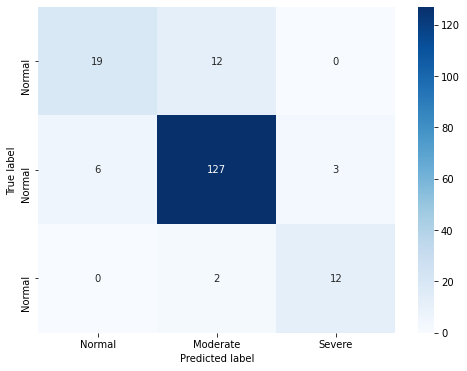

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data
confusion = confusion_matrix(y_test,y_pred_rf)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Normal', 'Moderate', 'Severe'], 
            yticklabels=['Normal', 'Normal', 'Normal'])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [21]:
ser22 = ser1[ser1==1]

In [25]:
m_list = list(ser22.index)

In [45]:
import random
m_list2 = random.sample(m_list,140)

In [46]:
ser3 = ser1[(ser1.index.isin(m_list2)) | (ser1!=1)]

In [47]:
df = cyt_norm[cyt_norm.index.isin(ser3.index)]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df, ser3, test_size=0.2, random_state=42)


In [49]:
for i in range(400, 501,50):
    rf = RandomForestClassifier(n_estimators=i, random_state=42)
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest Accuracy: {accuracy_rf}")
    print(i)

Random Forest Accuracy: 0.8987341772151899
100
Random Forest Accuracy: 0.8860759493670886
150
Random Forest Accuracy: 0.8734177215189873
200
Random Forest Accuracy: 0.8987341772151899
250
Random Forest Accuracy: 0.9113924050632911
300
Random Forest Accuracy: 0.8987341772151899
350
Random Forest Accuracy: 0.9113924050632911
400
Random Forest Accuracy: 0.8860759493670886
450
Random Forest Accuracy: 0.8734177215189873
500


In [51]:
rf = RandomForestClassifier(n_estimators=400, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Accuracy: 0.9113924050632911


In [52]:
df

CXCL9       LIF    CXCL11      IL25     IL12B      IL10  \
COV.CNO.001   2.802376  1.872317  1.589242  3.368379  2.369332  0.883650   
COV.CNO.002   2.776851  1.872317  1.753672  3.285965  2.418989  0.883650   
COV.CNO.003   2.703734  2.013649  1.532447  3.478785  1.645493  0.807755   
COV.CNO.004   2.703734  1.977113  1.699518  3.395835  2.296961  0.807755   
COV.CNO.005   2.679222  1.904081  1.532447  3.395835  2.393982  0.807755   
...                ...       ...       ...       ...       ...       ...   
COV.MCO.0091  3.196353  1.302953  1.872317  2.601010  2.549568  0.722531   
COV.MCO.0092  3.255644  1.376481  1.904081  2.393982  2.523381  1.096614   
COV.MCO.0101  3.134657  1.440070  2.418989  2.523381  3.017057  1.532447   
COV.MCO.0102  3.017057  1.502238  2.052558  2.013649  2.827815  0.958054   
COV.SCO.0791  2.990169  1.341072  1.840613  2.679222  2.626982  0.611006   

                  IL13      IL11      IL15      PTX3  ...     FURIN     FSTL3  \
COV.CNO.001   2.827815  3.134657  1.341072  2.853223  ...  3.341682  4.170668   
COV.CNO.002   2.653314  3.017057  1.341072  3.046105  ...  3.196353  4.170668   
COV.CNO.003   2.827815  3.017057  1.502238  2.574761  ...  3.165893  4.078918   
COV.CNO.004   2.626982  3.226589  1.470974  2.679222  ...  3.255644  4.017885   
COV.CNO.005   2.601010  3.134657  1.376481  2.827815  ...  3.255644  4.267368   
...                ...       ...       ...       ...  ...       ...       ...   
COV.MCO.0091  2.990169  3.017057  0.611006  3.532287  ...  3.255644  4.078918   
COV.MCO.0092  3.076138  2.990169  0.845703  3.341682  ...  3.165893  4.078918   
COV.MCO.0101  2.802376  3.076138  0.611006  4.137895  ...  3.613042  3.840712   
COV.MCO.0102  2.853223  3.076138  0.611006  3.927736  ...  2.881351  4.137895   
COV.SCO.0791  2.934366  2.574761  0.807755  3.134657  ...  3.104074  3.957388   

                FLT3LG       FAP     FABP4        F3      ESM1     ERBB3  \
COV.CNO.001   1.939624  4.474106  3.478785  1.699518  2.270535  3.840712   
COV.CNO.002   1.904081  4.664271  3.557813  1.699518  2.321868  3.899487   
COV.CNO.003   1.904081  4.597034  3.670176  1.575165  2.321868  3.840712   
COV.CNO.004   1.872317  4.630245  3.726534  1.561087  2.497534  3.784468   
COV.CNO.005   2.013649  4.864149  4.017885  1.409000  2.321868  3.812984   
...                ...       ...       ...       ...       ...       ...   
COV.MCO.0091  1.561087  4.170668  3.988308  1.376481  2.270535  4.137895   
COV.MCO.0092  1.840613  4.170668  3.957388  1.409000  2.726921  4.107963   
COV.MCO.0101  1.781110  4.321953  3.697648  1.645493  3.255644  3.756145   
COV.MCO.0102  1.212103  4.203890  3.532287  1.617337  2.393982  3.697648   
COV.SCO.0791  2.052558  4.501612  3.532287  1.575165  2.703734  3.670176   

                 ENPP2     WFDC2  
COV.CNO.001   4.532008  3.613042  
COV.CNO.002   4.774068  3.532287  
COV.CNO.003   4.630245  3.314094  
COV.CNO.004   4.562678  3.532287  
COV.CNO.005   4.597034  3.726534  
...                ...       ...  
COV.MCO.0091  4.399108  3.613042  
COV.MCO.0092  4.501612  3.641547  
COV.MCO.0101  4.399108  3.584654  
COV.MCO.0102  4.321953  3.670176  
COV.SCO.0791  4.532008  3.314094  

[393 rows x 166 columns]

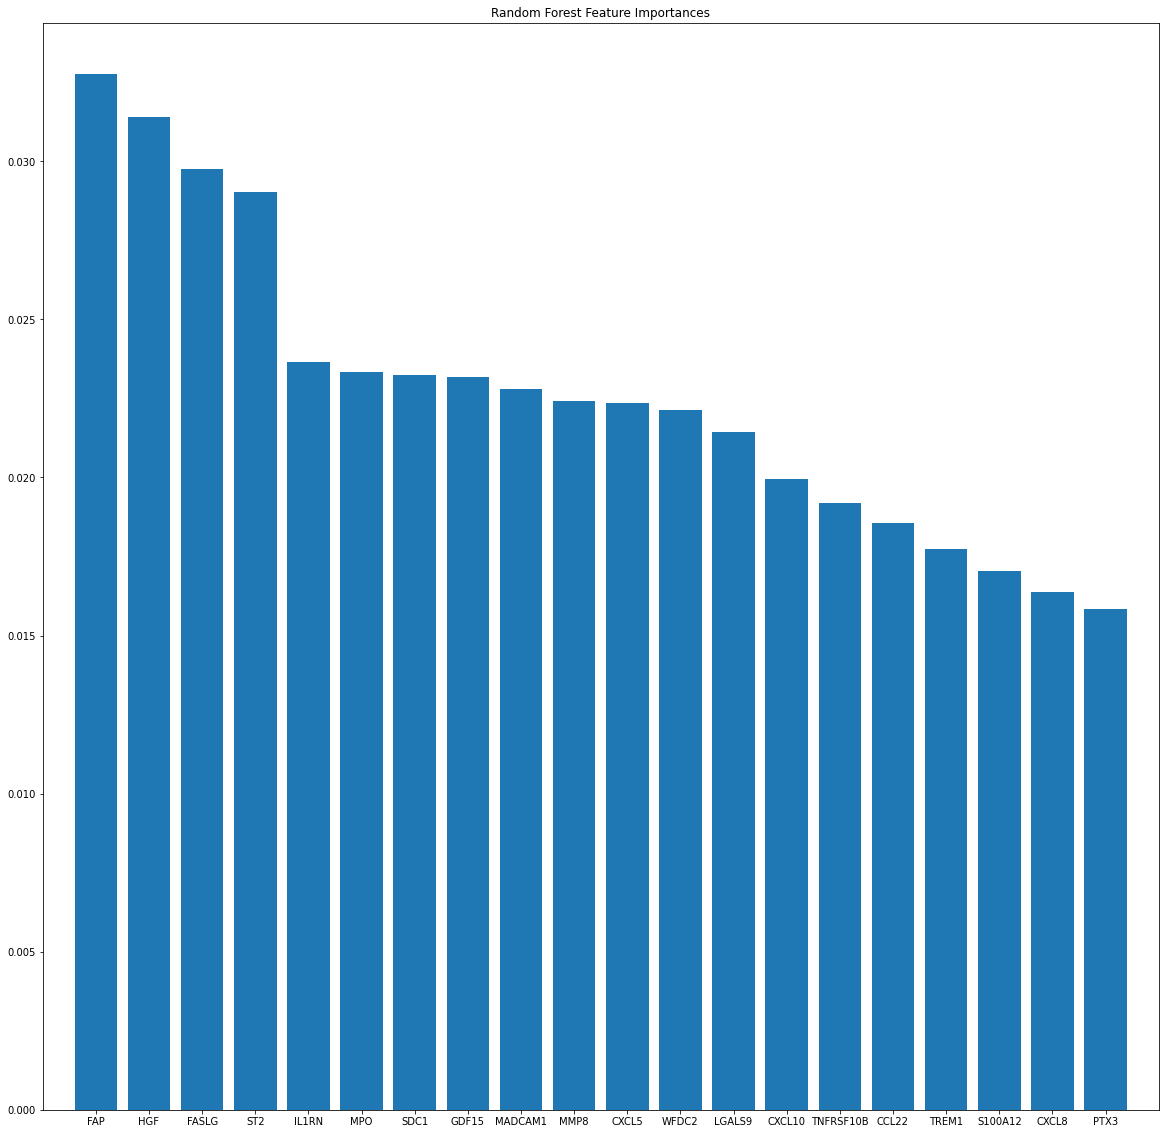

In [53]:
import matplotlib.pyplot as plt

# Feature importance from Random Forest
importances_rf = rf.feature_importances_
indices_rf = pd.Series(importances_rf,index = df.columns)
indices_rf = indices_rf.sort_values(ascending=False)
indices_rf.head(20)
plt.figure(figsize=(20,20))
plt.title("Random Forest Feature Importances")
plt.bar(range(20), indices_rf.head(20), align="center")
plt.xticks(range(20), indices_rf.head(20).index)
plt.xlim([-1, 20])
plt.show()


In [54]:
import shap

# Assuming that clf is your trained Random Forest model

# Initialize JavaScript visualization code for SHAP
shap.initjs()



Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


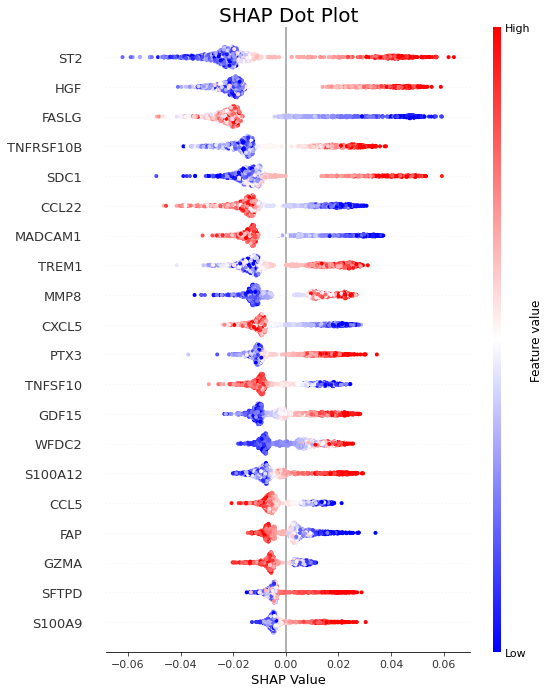

In [72]:
import matplotlib.pyplot as plt
tree_explainer = shap.TreeExplainer(rf) ## TreeExplainer 객체 생성
shap_values = tree_explainer.shap_values(cyt_norm) ## SHAP Value
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
shap.summary_plot(shap_values[2], cyt_norm, 
                   ## 변수명 표시
                  cmap='bwr', 
                  show=False, 
                 plot_type='dot')
ax.set_xlabel('SHAP Value')
ax.set_title('SHAP Dot Plot', fontsize=20)
plt.show()

In [56]:
sh1 = pd.DataFrame(shap_values[1],columns = cyt_norm.columns)
sh1.index = cyt_norm.index
sh1

CXCL9       LIF    CXCL11      IL25     IL12B      IL10  \
COV.CNO.001   0.000838  0.000594 -0.003629  0.001283  0.001533  0.002012   
COV.CNO.002  -0.000622 -0.000190 -0.003662  0.000546  0.000222  0.000447   
COV.CNO.003   0.000074  0.000724 -0.004772 -0.003509  0.000643 -0.000604   
COV.CNO.004  -0.000815  0.001045 -0.004817 -0.000414  0.001194 -0.001480   
COV.CNO.005  -0.000225  0.001267 -0.004643 -0.003885  0.001346 -0.000600   
...                ...       ...       ...       ...       ...       ...   
COV.SCO.0761  0.000479  0.000089  0.010966  0.001690 -0.000789  0.001047   
COV.SCO.0763  0.000219 -0.000203 -0.002917  0.001307  0.000304  0.000627   
COV.SCO.0772 -0.001353 -0.000313  0.014053 -0.000227  0.000336  0.002611   
COV.SCO.0791  0.000287 -0.000130 -0.002551  0.001706  0.000827 -0.000380   
COV.SCO.0802 -0.001634  0.000124  0.005182  0.000891  0.002708  0.000294   

                  IL13      IL11      IL15      PTX3  ...     FURIN     FSTL3  \
COV.CNO.001  -0.008688 -0.002460 -0.000390  0.002352  ... -0.000610 -0.001270   
COV.CNO.002  -0.005414 -0.001518 -0.000759 -0.001076  ... -0.000786 -0.000317   
COV.CNO.003  -0.006602 -0.001920  0.000346 -0.001518  ... -0.000917 -0.000037   
COV.CNO.004  -0.003824 -0.003486  0.000477 -0.000120  ... -0.000195 -0.000070   
COV.CNO.005   0.001841 -0.002577 -0.000693  0.001440  ... -0.000397 -0.001243   
...                ...       ...       ...       ...  ...       ...       ...   
COV.SCO.0761 -0.009966 -0.006065 -0.000353  0.002845  ...  0.000067  0.001152   
COV.SCO.0763 -0.008097 -0.002901 -0.000619  0.001905  ...  0.000198  0.000563   
COV.SCO.0772 -0.011453  0.001635 -0.000144 -0.001207  ...  0.000390 -0.000387   
COV.SCO.0791 -0.009030  0.003755 -0.000239  0.003457  ...  0.000267  0.001526   
COV.SCO.0802 -0.007462 -0.001637 -0.000672 -0.002135  ...  0.000061 -0.000089   

                FLT3LG       FAP     FABP4        F3      ESM1     ERBB3  \
COV.CNO.001   0.000150 -0.038402  0.002477 -0.004633 -0.001231 -0.000282   
COV.CNO.002   0.001103 -0.037313  0.000319 -0.006210 -0.001358 -0.000521   
COV.CNO.003   0.001003 -0.036383 -0.000348 -0.000869 -0.001300 -0.000481   
COV.CNO.004   0.002626 -0.035077 -0.000112 -0.001835 -0.000330 -0.000346   
COV.CNO.005  -0.000453 -0.036195 -0.000280  0.000539 -0.000777 -0.000448   
...                ...       ...       ...       ...       ...       ...   
COV.SCO.0761  0.001996 -0.036169 -0.000318  0.003994 -0.000790 -0.000230   
COV.SCO.0763  0.004648 -0.020432 -0.000299  0.001103 -0.000881 -0.000089   
COV.SCO.0772  0.004419 -0.004635  0.001821  0.000906  0.000419  0.000917   
COV.SCO.0791  0.003053 -0.023646  0.001798 -0.000265  0.008592  0.001136   
COV.SCO.0802 -0.000051  0.024605  0.000363  0.003108 -0.000240  0.002683   

                 ENPP2     WFDC2  
COV.CNO.001  -0.005928  0.024134  
COV.CNO.002  -0.010397 -0.011872  
COV.CNO.003  -0.008806 -0.014471  
COV.CNO.004  -0.007307 -0.014066  
COV.CNO.005  -0.010558  0.022933  
...                ...       ...  
COV.SCO.0761 -0.007120 -0.014078  
COV.SCO.0763  0.003731 -0.007324  
COV.SCO.0772  0.006568 -0.000861  
COV.SCO.0791  0.000691 -0.005137  
COV.SCO.0802  0.007733  0.012618  

[1159 rows x 166 columns]

In [57]:
sh2 = pd.DataFrame(shap_values[2],columns = cyt_norm.columns)
sh2.index = cyt_norm.index
sh2

CXCL9       LIF    CXCL11      IL25     IL12B      IL10  \
COV.CNO.001  -0.000632 -0.001981 -0.000574 -0.000273 -0.000613  0.000143   
COV.CNO.002  -0.000284 -0.001791 -0.000619 -0.000286 -0.000543 -0.000271   
COV.CNO.003  -0.000319 -0.001786  0.000073 -0.000365 -0.001149 -0.000097   
COV.CNO.004  -0.000182 -0.001954 -0.000275 -0.000332 -0.000750 -0.000391   
COV.CNO.005  -0.000310 -0.001921  0.000210 -0.000430 -0.000631 -0.000048   
...                ...       ...       ...       ...       ...       ...   
COV.SCO.0761 -0.000134  0.000134  0.001155  0.000216  0.000024  0.000053   
COV.SCO.0763 -0.000388  0.000345  0.001015  0.000329 -0.000576  0.000092   
COV.SCO.0772  0.000903  0.001135 -0.005652  0.001237 -0.000596  0.000135   
COV.SCO.0791  0.000211  0.000176 -0.000022 -0.000111 -0.000333 -0.000498   
COV.SCO.0802  0.001717  0.000807 -0.000152  0.000092 -0.001903  0.000052   

                  IL13      IL11      IL15      PTX3  ...     FURIN     FSTL3  \
COV.CNO.001   0.000211  0.000341  0.000008 -0.010876  ...  0.000042  0.000337   
COV.CNO.002  -0.000122  0.000155 -0.000034 -0.010022  ...  0.000028 -0.000075   
COV.CNO.003   0.000271  0.000205 -0.000269 -0.009523  ...  0.000028 -0.000090   
COV.CNO.004  -0.000215  0.000299 -0.000016 -0.009677  ...  0.000045 -0.000017   
COV.CNO.005  -0.000042  0.000155  0.000015 -0.011191  ... -0.000190 -0.000009   
...                ...       ...       ...       ...  ...       ...       ...   
COV.SCO.0761  0.000658  0.000986  0.000049 -0.011233  ...  0.000057  0.000050   
COV.SCO.0763 -0.000157 -0.000226  0.000518 -0.010679  ...  0.000202 -0.000237   
COV.SCO.0772  0.001629 -0.000373 -0.000048  0.012009  ...  0.000004  0.000538   
COV.SCO.0791  0.001237 -0.000576  0.000073 -0.008799  ... -0.000073 -0.000063   
COV.SCO.0802  0.001824  0.000569  0.000549  0.012388  ...  0.000465  0.000352   

                FLT3LG       FAP     FABP4        F3      ESM1     ERBB3  \
COV.CNO.001  -0.003257 -0.007526 -0.000161  0.005125 -0.000032 -0.000100   
COV.CNO.002  -0.002856 -0.007023  0.000148  0.003713 -0.000556 -0.000210   
COV.CNO.003  -0.002790 -0.006366 -0.000154 -0.000175 -0.000050 -0.000185   
COV.CNO.004  -0.002827 -0.006579 -0.000168 -0.000204 -0.000120 -0.000028   
COV.CNO.005  -0.002962 -0.008036  0.000179 -0.001444 -0.000093 -0.000102   
...                ...       ...       ...       ...       ...       ...   
COV.SCO.0761 -0.003876 -0.009363  0.000042 -0.002256  0.000311 -0.000079   
COV.SCO.0763 -0.006037 -0.006531  0.000828 -0.001491  0.000168 -0.000588   
COV.SCO.0772 -0.004647 -0.008672 -0.000459 -0.001152 -0.000095  0.000239   
COV.SCO.0791 -0.003605 -0.010528 -0.000242 -0.000366  0.000363  0.000368   
COV.SCO.0802  0.002149  0.005077  0.000737 -0.003075 -0.000215 -0.002632   

                 ENPP2     WFDC2  
COV.CNO.001  -0.002818  0.008448  
COV.CNO.002  -0.002816 -0.007397  
COV.CNO.003  -0.002166 -0.007877  
COV.CNO.004  -0.002151 -0.007063  
COV.CNO.005  -0.002538  0.008889  
...                ...       ...  
COV.SCO.0761 -0.002686 -0.007458  
COV.SCO.0763  0.000750 -0.010414  
COV.SCO.0772  0.000778 -0.011021  
COV.SCO.0791 -0.002084 -0.013347  
COV.SCO.0802  0.003103  0.007629  

[1159 rows x 166 columns]

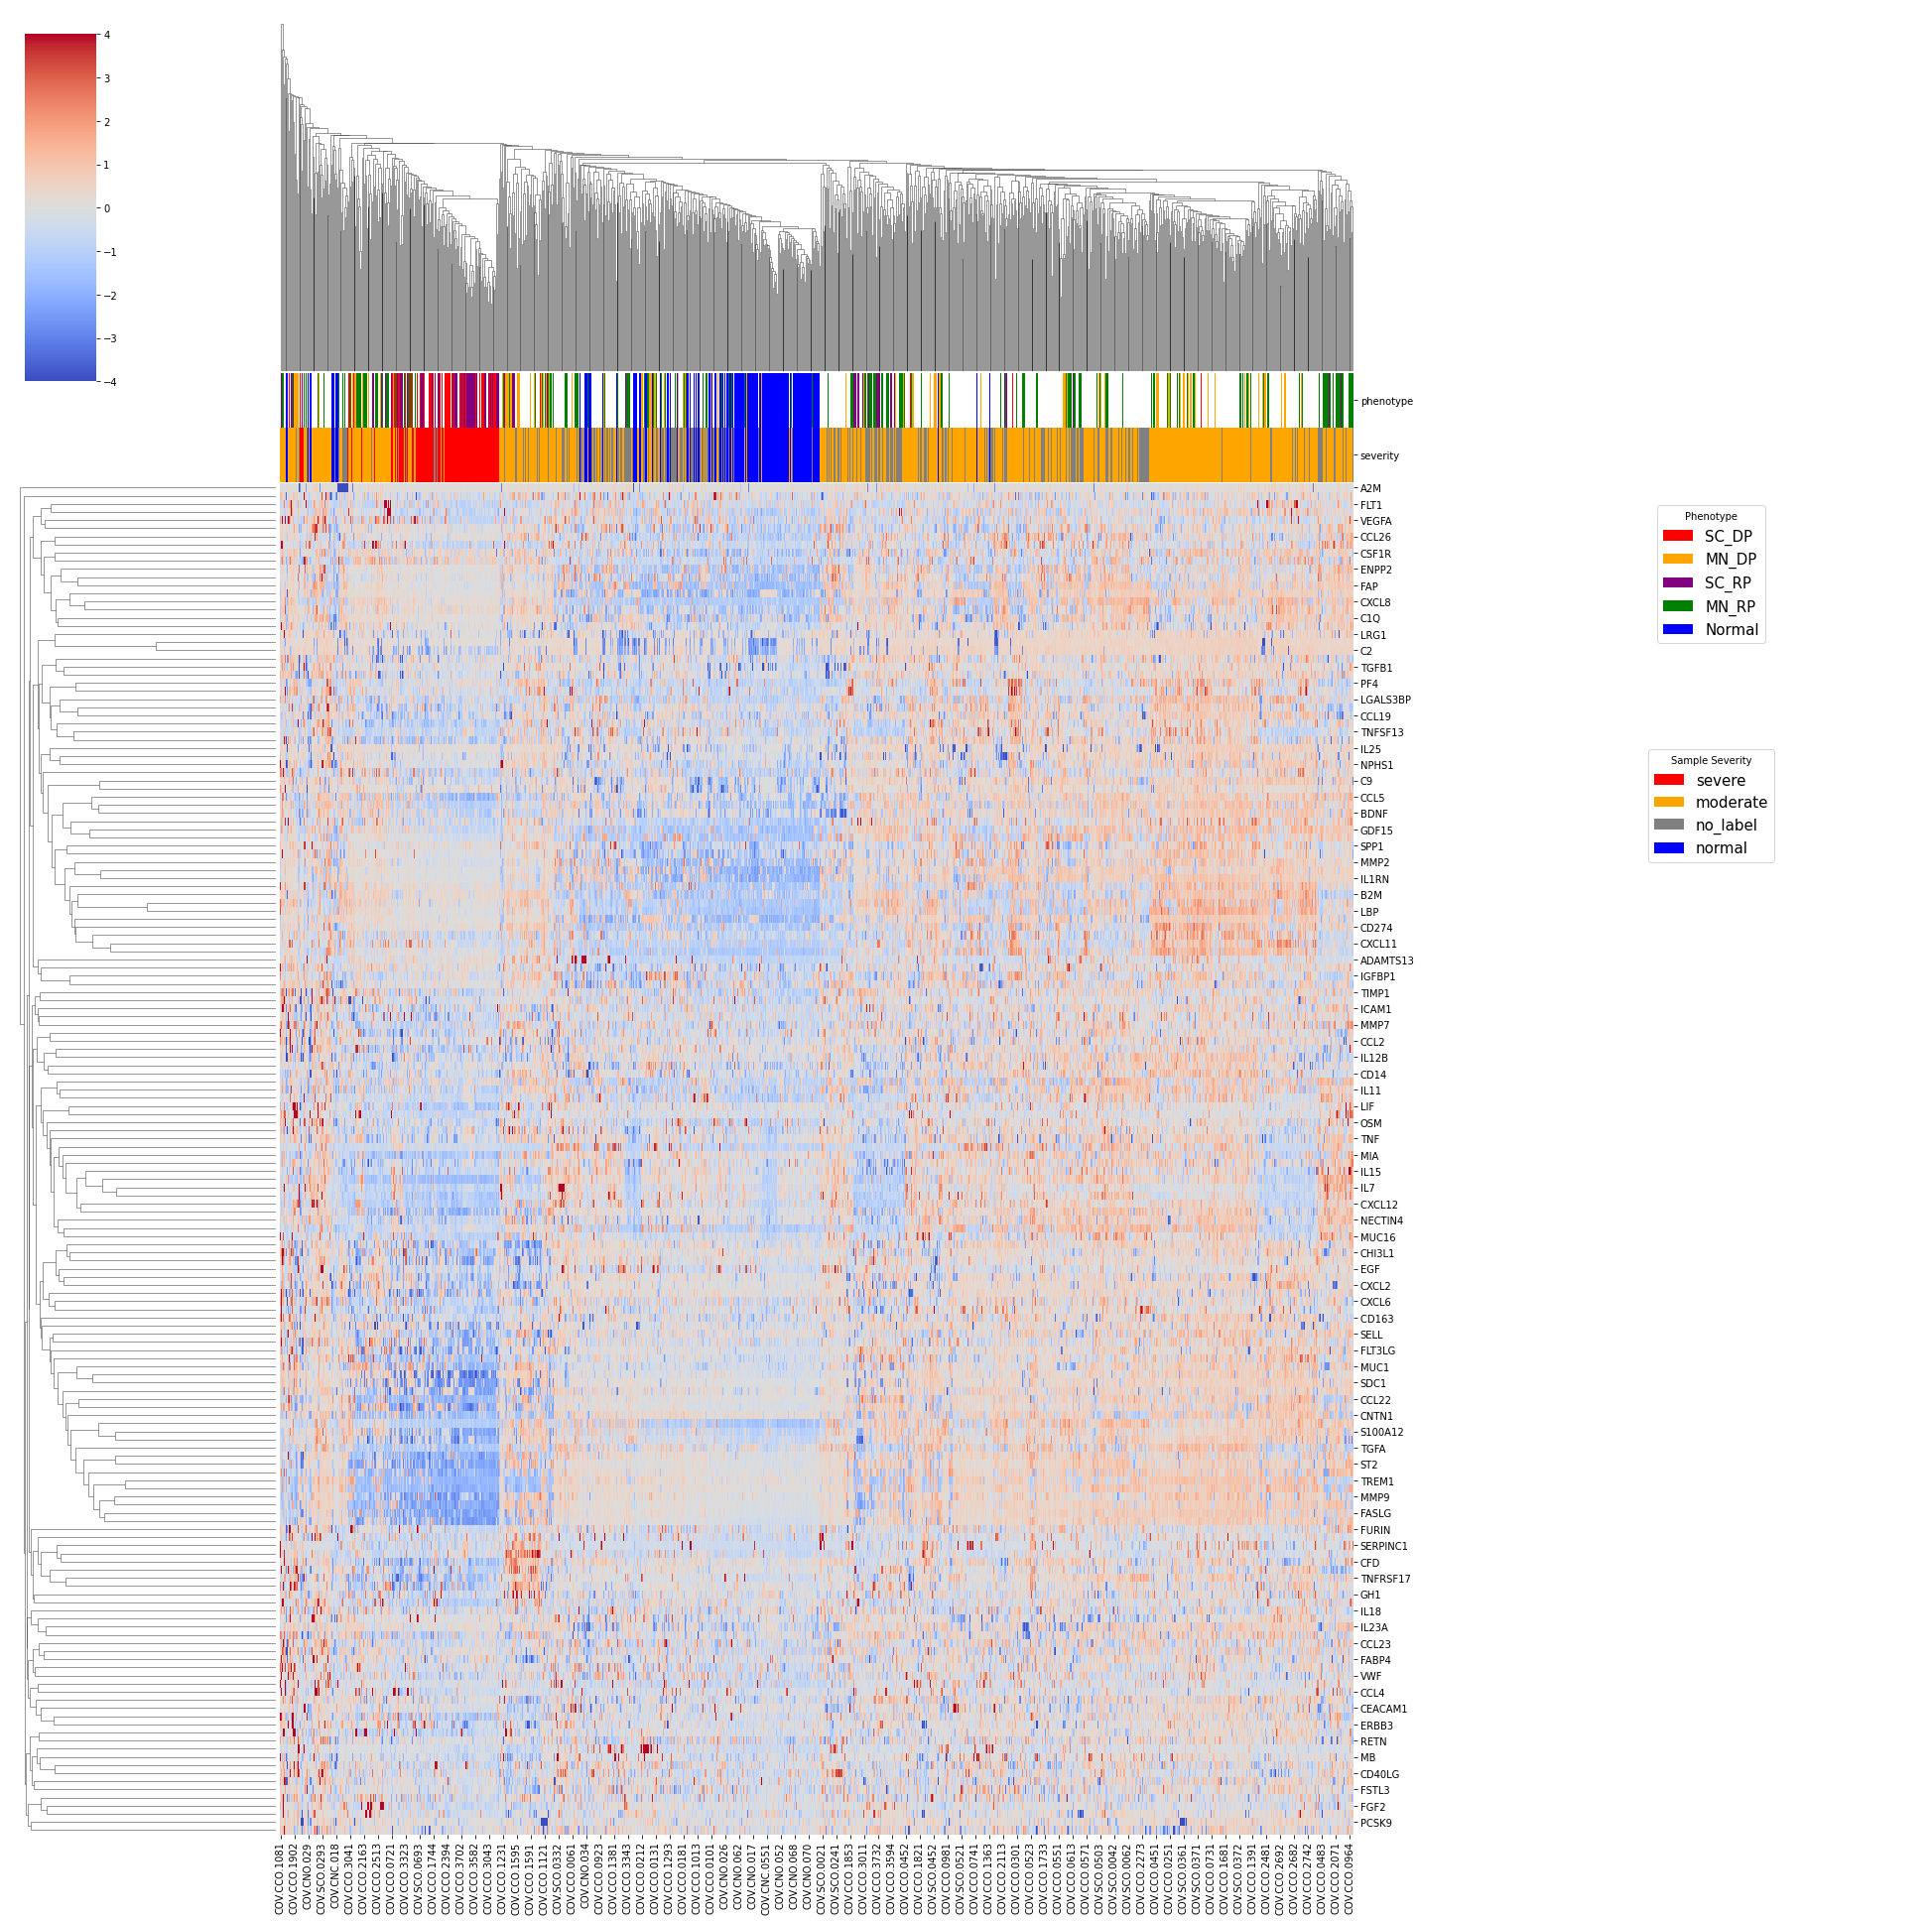

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# Sample data (assuming it's stored in a dataframe called 'df')
label_colors_1 = {
    'Normal': 'white',
    'Patient': 'black',
    # ... add more labels and colors as needed
}
label_colors_2 = {
   
    'SC_DP': 'red',
    'MN_DP': 'orange',
    'SC_RP': 'purple',
    'MN_RP': 'green',
    'Normal': 'blue'
    # ... add more labels and colors as needed for the second category
}
label_colors_3 = {
   
    'severe': 'red',
    'moderate': 'orange',
    'no_label': 'grey',
    'normal':'blue'
    # ... add more labels and colors as needed for the second category
}
label_colors_4 = {
    'DP' :'red',
    'RP' : 'blue',
    'no_label':'grey'
}

# palette_18 = sns.color_palette("tab20",11)
# palette_compare = sns.color_palette('tab20',4)
# unique_compare = set(clusters_compare)
# color_mapping_compare = dict(zip(unique_compare,palette_compare))
# unique_values = set(sev_specific['DB_clusters'])
# color_mapping = dict(zip(unique_values, palette_18))
# col_colors_4 = sev_specific['DB_clusters'].map(color_mapping)
# compare_series = pd.Series(clusters_compare,index = df_compare.index)
# col_colors_compare = compare_series.map(color_mapping_compare)


col_colors_1 = all_sev_prob.pheno_fi.map(label_colors_2)
col_colors_2 = all_sev_prob['Severity'].map(label_colors_1)
col_colors_3 = all_sev_prob['who'].map(label_colors_3)
# col_colors_4 = all_sev_prob['phenotype2'].map(label_colors_4)
# col_colors = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3, 'DB_SCAN':col_colors_4})
col_colors = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3})

# col_colors_c = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3, 'DB_SCAN':col_colors_compare})

legend_elements_1 = [Patch(facecolor=color, label=label) for label, color in label_colors_1.items()]
legend_elements_2 = [Patch(facecolor=color, label=label) for label, color in label_colors_2.items()]
legend_elements_3 = [Patch(facecolor=color, label=label) for label, color in label_colors_3.items()]
# legend_elements_4 = [Patch(facecolor=color, label=label) for label, color in color_mapping.items()]
# legend_element_compare = [Patch(facecolor=color,label=label)for label,color in color_mapping_compare.items()]
# Create custom axes for legends
g= sns.clustermap(sh1.T, cmap='coolwarm', figsize=(20, 27), col_colors=col_colors, z_score = 0,vmin=-4,vmax=4)

legend_ax_2 = g.fig.add_axes([1.05, 0.60, 0.3, 0.2])
legend_ax_3 = g.fig.add_axes([1.05, 0.48, 0.3, 0.2])
# legend_ax_4 = g.fig.add_axes([1.05, 0.33, 0.3, 0.2])

# Add legends to the custom axes


legend_ax_2.legend(handles=legend_elements_2, title="Phenotype", loc="center", fontsize = 15)
legend_ax_2.axis('off')  # Turn off the axis

legend_ax_3.legend(handles=legend_elements_3, title="Sample Severity", loc="center", fontsize = 15)
legend_ax_3.axis('off')  # Turn off the axis

# legend_ax_4.legend(handles=legend_elements_4, title="DB SCAN", loc="center", fontsize = 15)
# legend_ax_4.axis('off')  # Turn off the axis


# l3l = []
# for i in l2l:
#     l3l.append(list(g.data2d.index).index(i))
# for pos in l3l:
#     g.ax_heatmap.axhline(pos, color='red', lw=2)

plt.show()

In [62]:
sev_specific = all_sev_prob[all_sev_prob.pheno_fi != 'no_label']

In [61]:
all_sev_prob = pd.read_csv('/data1/home/EYH/network/all_sev_fi.csv',index_col=0)

In [63]:
sh11 = sh1[sh1.index.isin(sev_specific.index)]

In [64]:
sh22 = sh2[sh2.index.isin(sev_specific.index)]

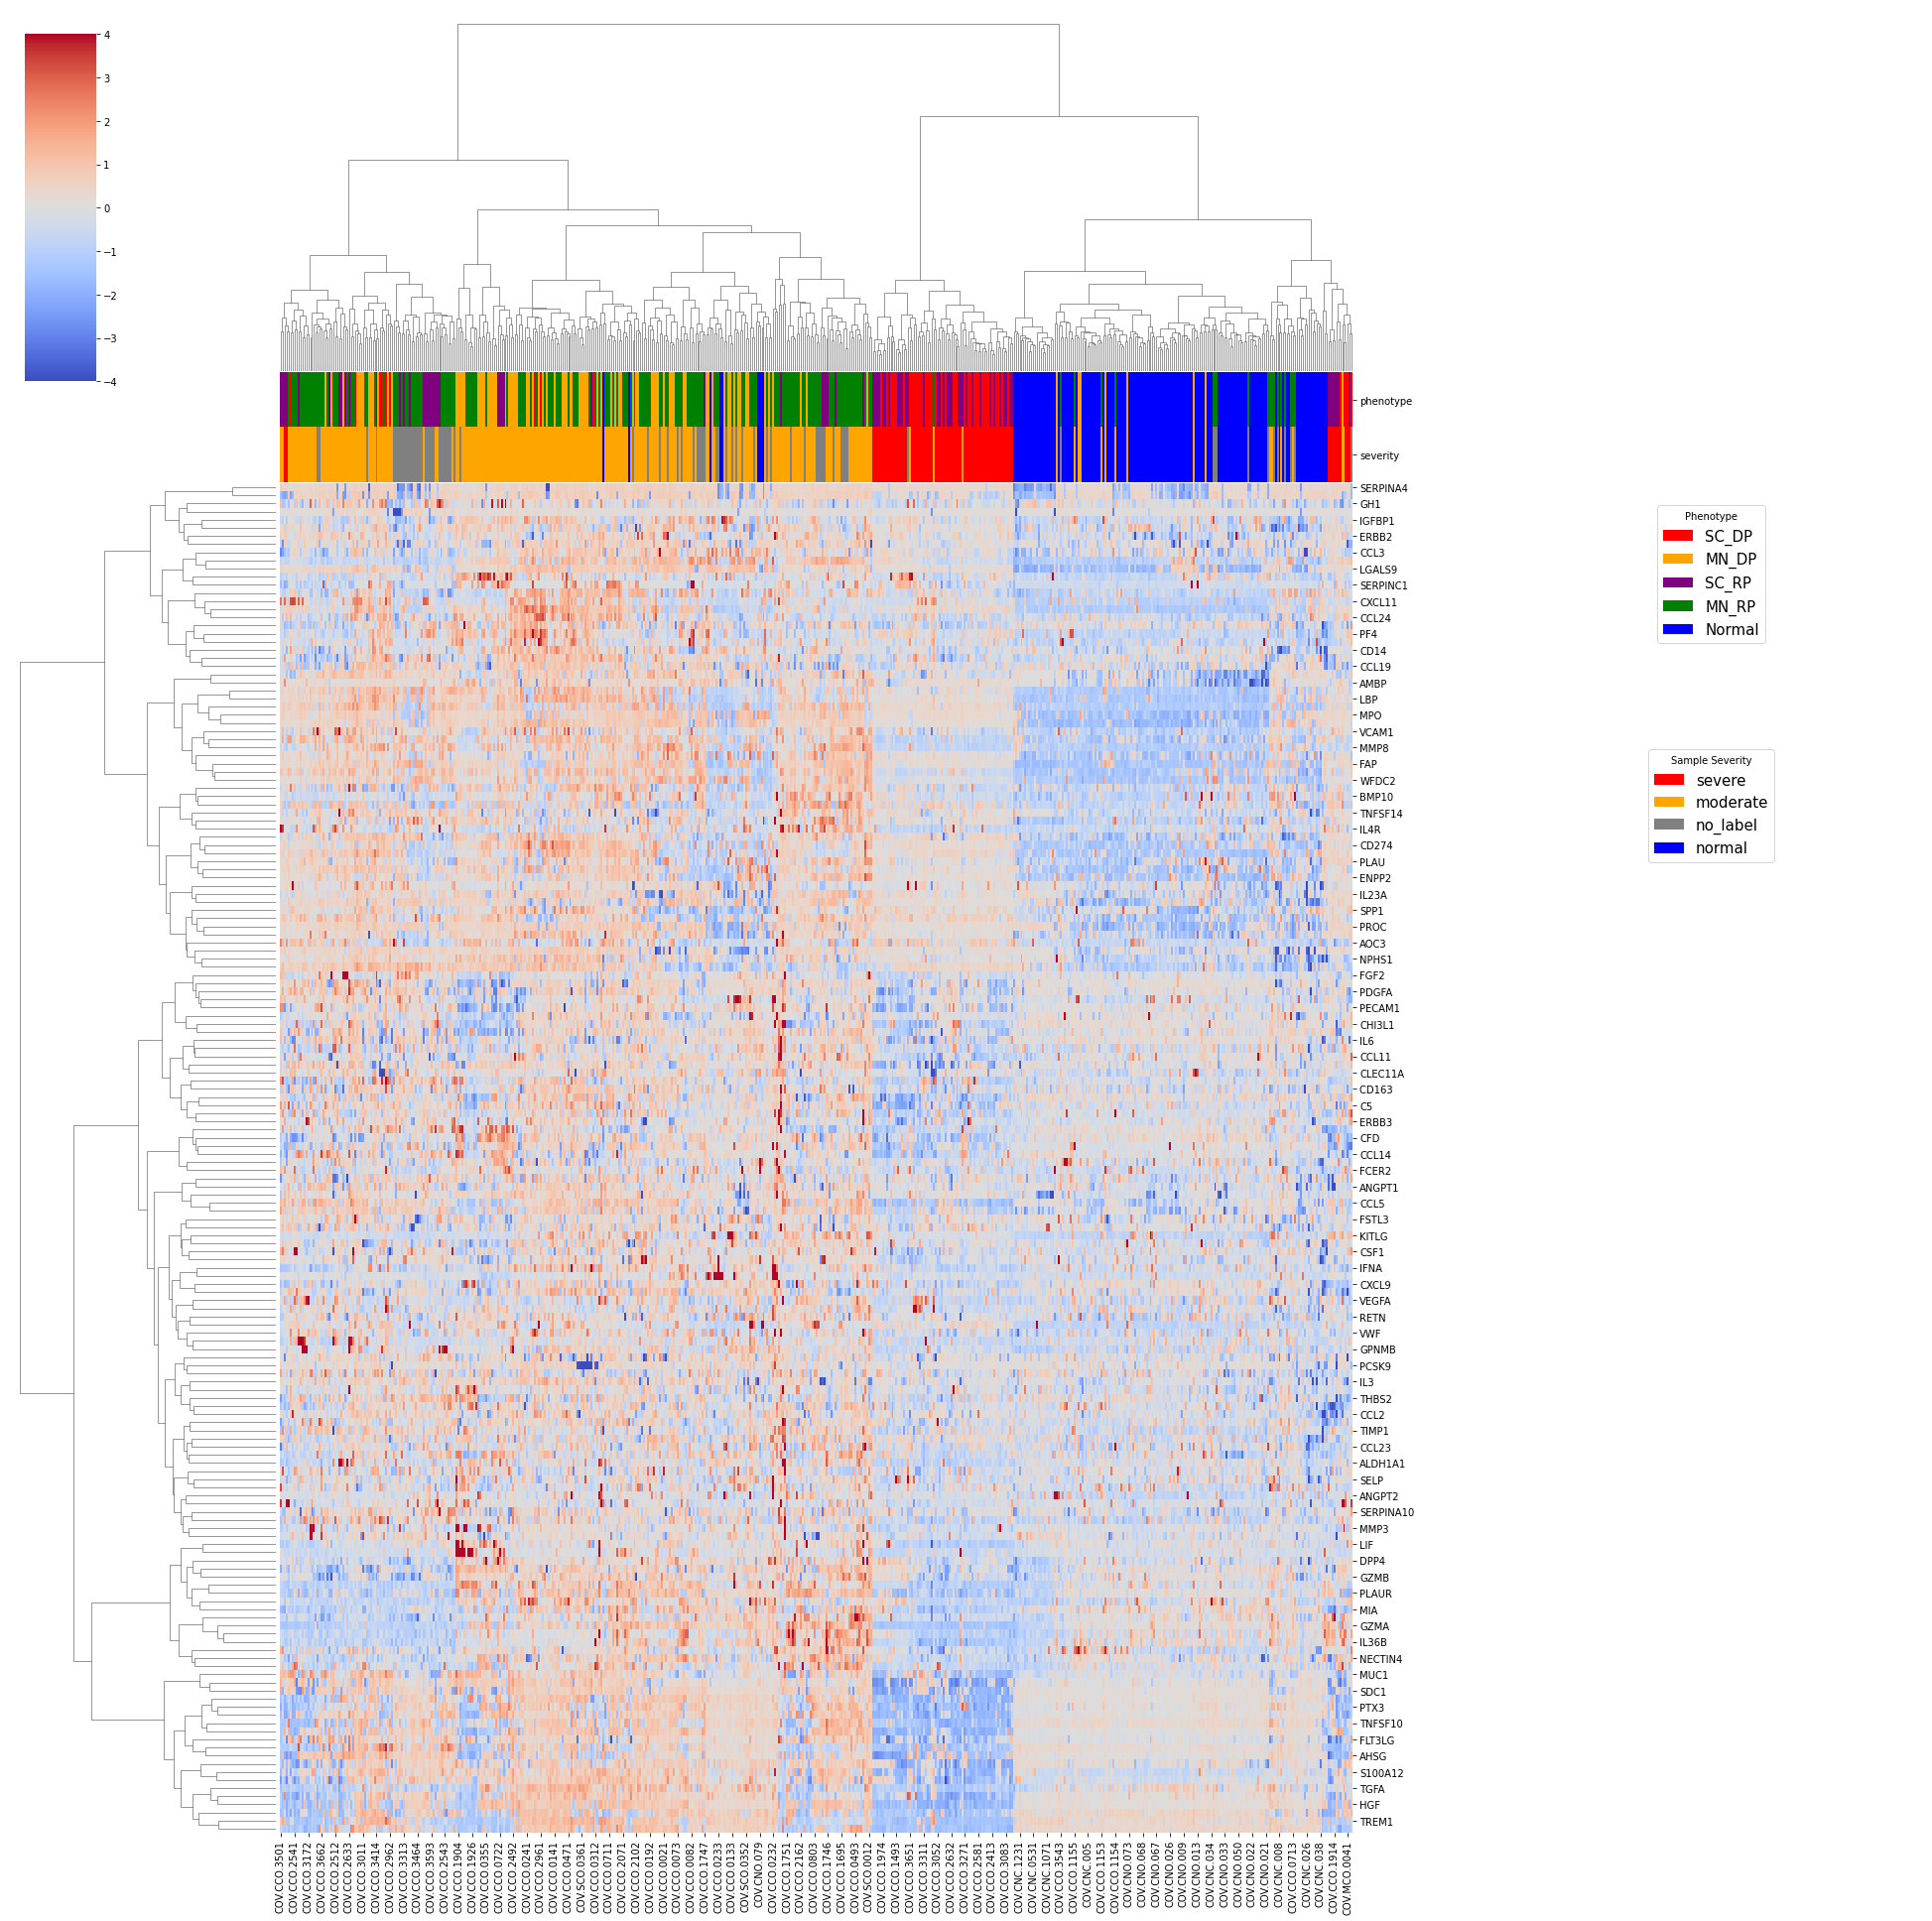

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# Sample data (assuming it's stored in a dataframe called 'df')
label_colors_1 = {
    'Normal': 'white',
    'Patient': 'black',
    # ... add more labels and colors as needed
}
label_colors_2 = {
   
    'SC_DP': 'red',
    'MN_DP': 'orange',
    'SC_RP': 'purple',
    'MN_RP': 'green',
    'Normal': 'blue'
    # ... add more labels and colors as needed for the second category
}
label_colors_3 = {
   
    'severe': 'red',
    'moderate': 'orange',
    'no_label': 'grey',
    'normal':'blue'
    # ... add more labels and colors as needed for the second category
}
label_colors_4 = {
    'DP' :'red',
    'RP' : 'blue',
    'no_label':'grey'
}

# palette_18 = sns.color_palette("tab20",11)
# palette_compare = sns.color_palette('tab20',4)
# unique_compare = set(clusters_compare)
# color_mapping_compare = dict(zip(unique_compare,palette_compare))
# unique_values = set(sev_specific['DB_clusters'])
# color_mapping = dict(zip(unique_values, palette_18))
# col_colors_4 = sev_specific['DB_clusters'].map(color_mapping)
# compare_series = pd.Series(clusters_compare,index = df_compare.index)
# col_colors_compare = compare_series.map(color_mapping_compare)


col_colors_1 = all_sev_prob.pheno_fi.map(label_colors_2)
col_colors_2 = all_sev_prob['Severity'].map(label_colors_1)
col_colors_3 = all_sev_prob['who'].map(label_colors_3)
# col_colors_4 = all_sev_prob['phenotype2'].map(label_colors_4)
# col_colors = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3, 'DB_SCAN':col_colors_4})
col_colors = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3})

# col_colors_c = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3, 'DB_SCAN':col_colors_compare})

legend_elements_1 = [Patch(facecolor=color, label=label) for label, color in label_colors_1.items()]
legend_elements_2 = [Patch(facecolor=color, label=label) for label, color in label_colors_2.items()]
legend_elements_3 = [Patch(facecolor=color, label=label) for label, color in label_colors_3.items()]
# legend_elements_4 = [Patch(facecolor=color, label=label) for label, color in color_mapping.items()]
# legend_element_compare = [Patch(facecolor=color,label=label)for label,color in color_mapping_compare.items()]
# Create custom axes for legends
g= sns.clustermap(sh11.T, cmap='coolwarm', figsize=(20, 27), col_colors=col_colors, z_score = 0,vmin=-4,vmax=4, method = 'ward')

legend_ax_2 = g.fig.add_axes([1.05, 0.60, 0.3, 0.2])
legend_ax_3 = g.fig.add_axes([1.05, 0.48, 0.3, 0.2])
# legend_ax_4 = g.fig.add_axes([1.05, 0.33, 0.3, 0.2])

# Add legends to the custom axes


legend_ax_2.legend(handles=legend_elements_2, title="Phenotype", loc="center", fontsize = 15)
legend_ax_2.axis('off')  # Turn off the axis

legend_ax_3.legend(handles=legend_elements_3, title="Sample Severity", loc="center", fontsize = 15)
legend_ax_3.axis('off')  # Turn off the axis

# legend_ax_4.legend(handles=legend_elements_4, title="DB SCAN", loc="center", fontsize = 15)
# legend_ax_4.axis('off')  # Turn off the axis


# l3l = []
# for i in l2l:
#     l3l.append(list(g.data2d.index).index(i))
# for pos in l3l:
#     g.ax_heatmap.axhline(pos, color='red', lw=2)

plt.show()

In [84]:
g1g

COV.CCO.3501  COV.CCO.3502  COV.CCO.3731  COV.CCO.3421  \
SERPINA4       0.547777      0.364808      0.485796      0.410635   
C2            -1.504158     -2.106392     -2.303206     -2.050187   
GH1            1.100817     -1.334923     -1.166288     -0.204527   
A2M            0.084655      0.084655      0.086185      0.038639   
IGFBP1        -0.609770     -1.005163     -0.092002     -1.090599   
...                 ...           ...           ...           ...   
MMP9          -0.850206     -1.632494      2.168729     -1.770059   
HGF           -0.955027     -1.506858     -1.114780     -2.088669   
CNTN1         -1.573496     -1.321956     -0.147065     -1.908179   
TREM1          0.827604      1.701039      1.046017     -1.319308   
TNFRSF10B     -0.673058     -1.017359     -1.234367     -0.896403   

           COV.CCO.3631  COV.CCO.2631  COV.CCO.2651  COV.CCO.2541  \
SERPINA4       0.245144      0.287057      0.235142      0.296043   
C2             0.728866     -2.307369     -1.728327      0.429783   
GH1           -1.492413      0.014898      0.089603     -1.036488   
A2M            0.148880      0.122141      0.148880      0.148880   
IGFBP1        -0.100132      0.054574     -0.084356      0.473246   
...                 ...           ...           ...           ...   
MMP9          -1.776206     -0.930405     -1.911775     -1.950871   
HGF           -1.207977     -0.882825     -1.345954     -1.837226   
CNTN1         -1.139133     -2.159050     -0.440273     -1.888806   
TREM1         -1.360404     -0.072718      0.071710     -1.312627   
TNFRSF10B     -1.471479     -0.952536     -1.074629     -1.538785   

           COV.CCO.2652  COV.CCO.2583  ...  COV.CCO.1914  COV.CCO.1742  \
SERPINA4       0.407624      0.358986  ...      0.342747      0.379898   
C2             0.578322      0.463023  ...      0.578414      0.539243   
GH1            1.205911      0.275379  ...     -1.671715     -1.238343   
A2M            0.148880      0.082781  ...      0.161832      0.031729   
IGFBP1        -0.585823     -0.644035  ...      0.368552      0.674988   
...                 ...           ...  ...           ...           ...   
MMP9          -2.541704     -2.038769  ...     -2.297193      0.619603   
HGF           -1.220135     -0.961662  ...     -1.518821      0.978919   
CNTN1         -1.356456     -1.963758  ...     -1.860552      0.662666   
TREM1         -1.389806     -1.507918  ...     -1.105889     -0.657014   
TNFRSF10B     -1.253671     -1.131549  ...      0.093547     -1.236549   

           COV.CCO.1743  COV.CCO.1744  COV.CCO.1692  COV.CCO.2023  \
SERPINA4       0.412544      0.456656      0.487135      0.368180   
C2             0.313212      0.345522     -1.959095     -1.317327   
GH1            0.371199     -2.336027     -2.675780     -0.991855   
A2M            0.069911      0.046900      0.030473      0.030473   
IGFBP1        -0.399664     -0.714335     -1.178990      0.077978   
...                 ...           ...           ...           ...   
MMP9          -1.111989     -2.103445      0.421852      0.375742   
HGF           -1.368533     -1.477458     -0.839460      1.120576   
CNTN1          1.316789     -0.120546     -1.184736      1.094966   
TREM1         -1.144167     -1.350388     -0.961106     -1.096914   
TNFRSF10B     -2.082713     -2.219018     -1.247079     -1.173748   

           COV.CCO.2024  COV.MCO.0041  COV.MCO.0042  COV.MCO.0043  
SERPINA4       0.281335      0.417355      0.262207     -1.647783  
C2            -1.068722      0.427265      0.503116     -1.689859  
GH1            0.145787     -0.309113     -1.342858     -0.204548  
A2M            0.030473      0.045917      0.069911      0.053484  
IGFBP1        -0.288227     -0.136037     -0.020346      0.123032  
...                 ...           ...           ...           ...  
MMP9          -1.763250      0.295547     -0.253435      0.597528  
HGF            1.082579      1.103957     -1.733055      1.038339  
CNTN1          0.681403

In [78]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib.patches import Patch
# 1. Perform hierarchical clustering
row_linkage = linkage(g.data2d, method='ward', metric='euclidean')

# 2. Cut the dendrogram to obtain 4 clusters
k = 7
row_cluster_labels = fcluster(row_linkage, k, criterion='maxclust')


In [95]:
len(col_cluster_labels)

166

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib.patches import Patch
# 1. Perform hierarchical clustering
col_linkage = linkage(g1g.T, method='ward', metric='euclidean')

# 2. Cut the dendrogram to obtain 4 clusters
k = 7
col_cluster_labels = fcluster(col_linkage, k, criterion='maxclust')


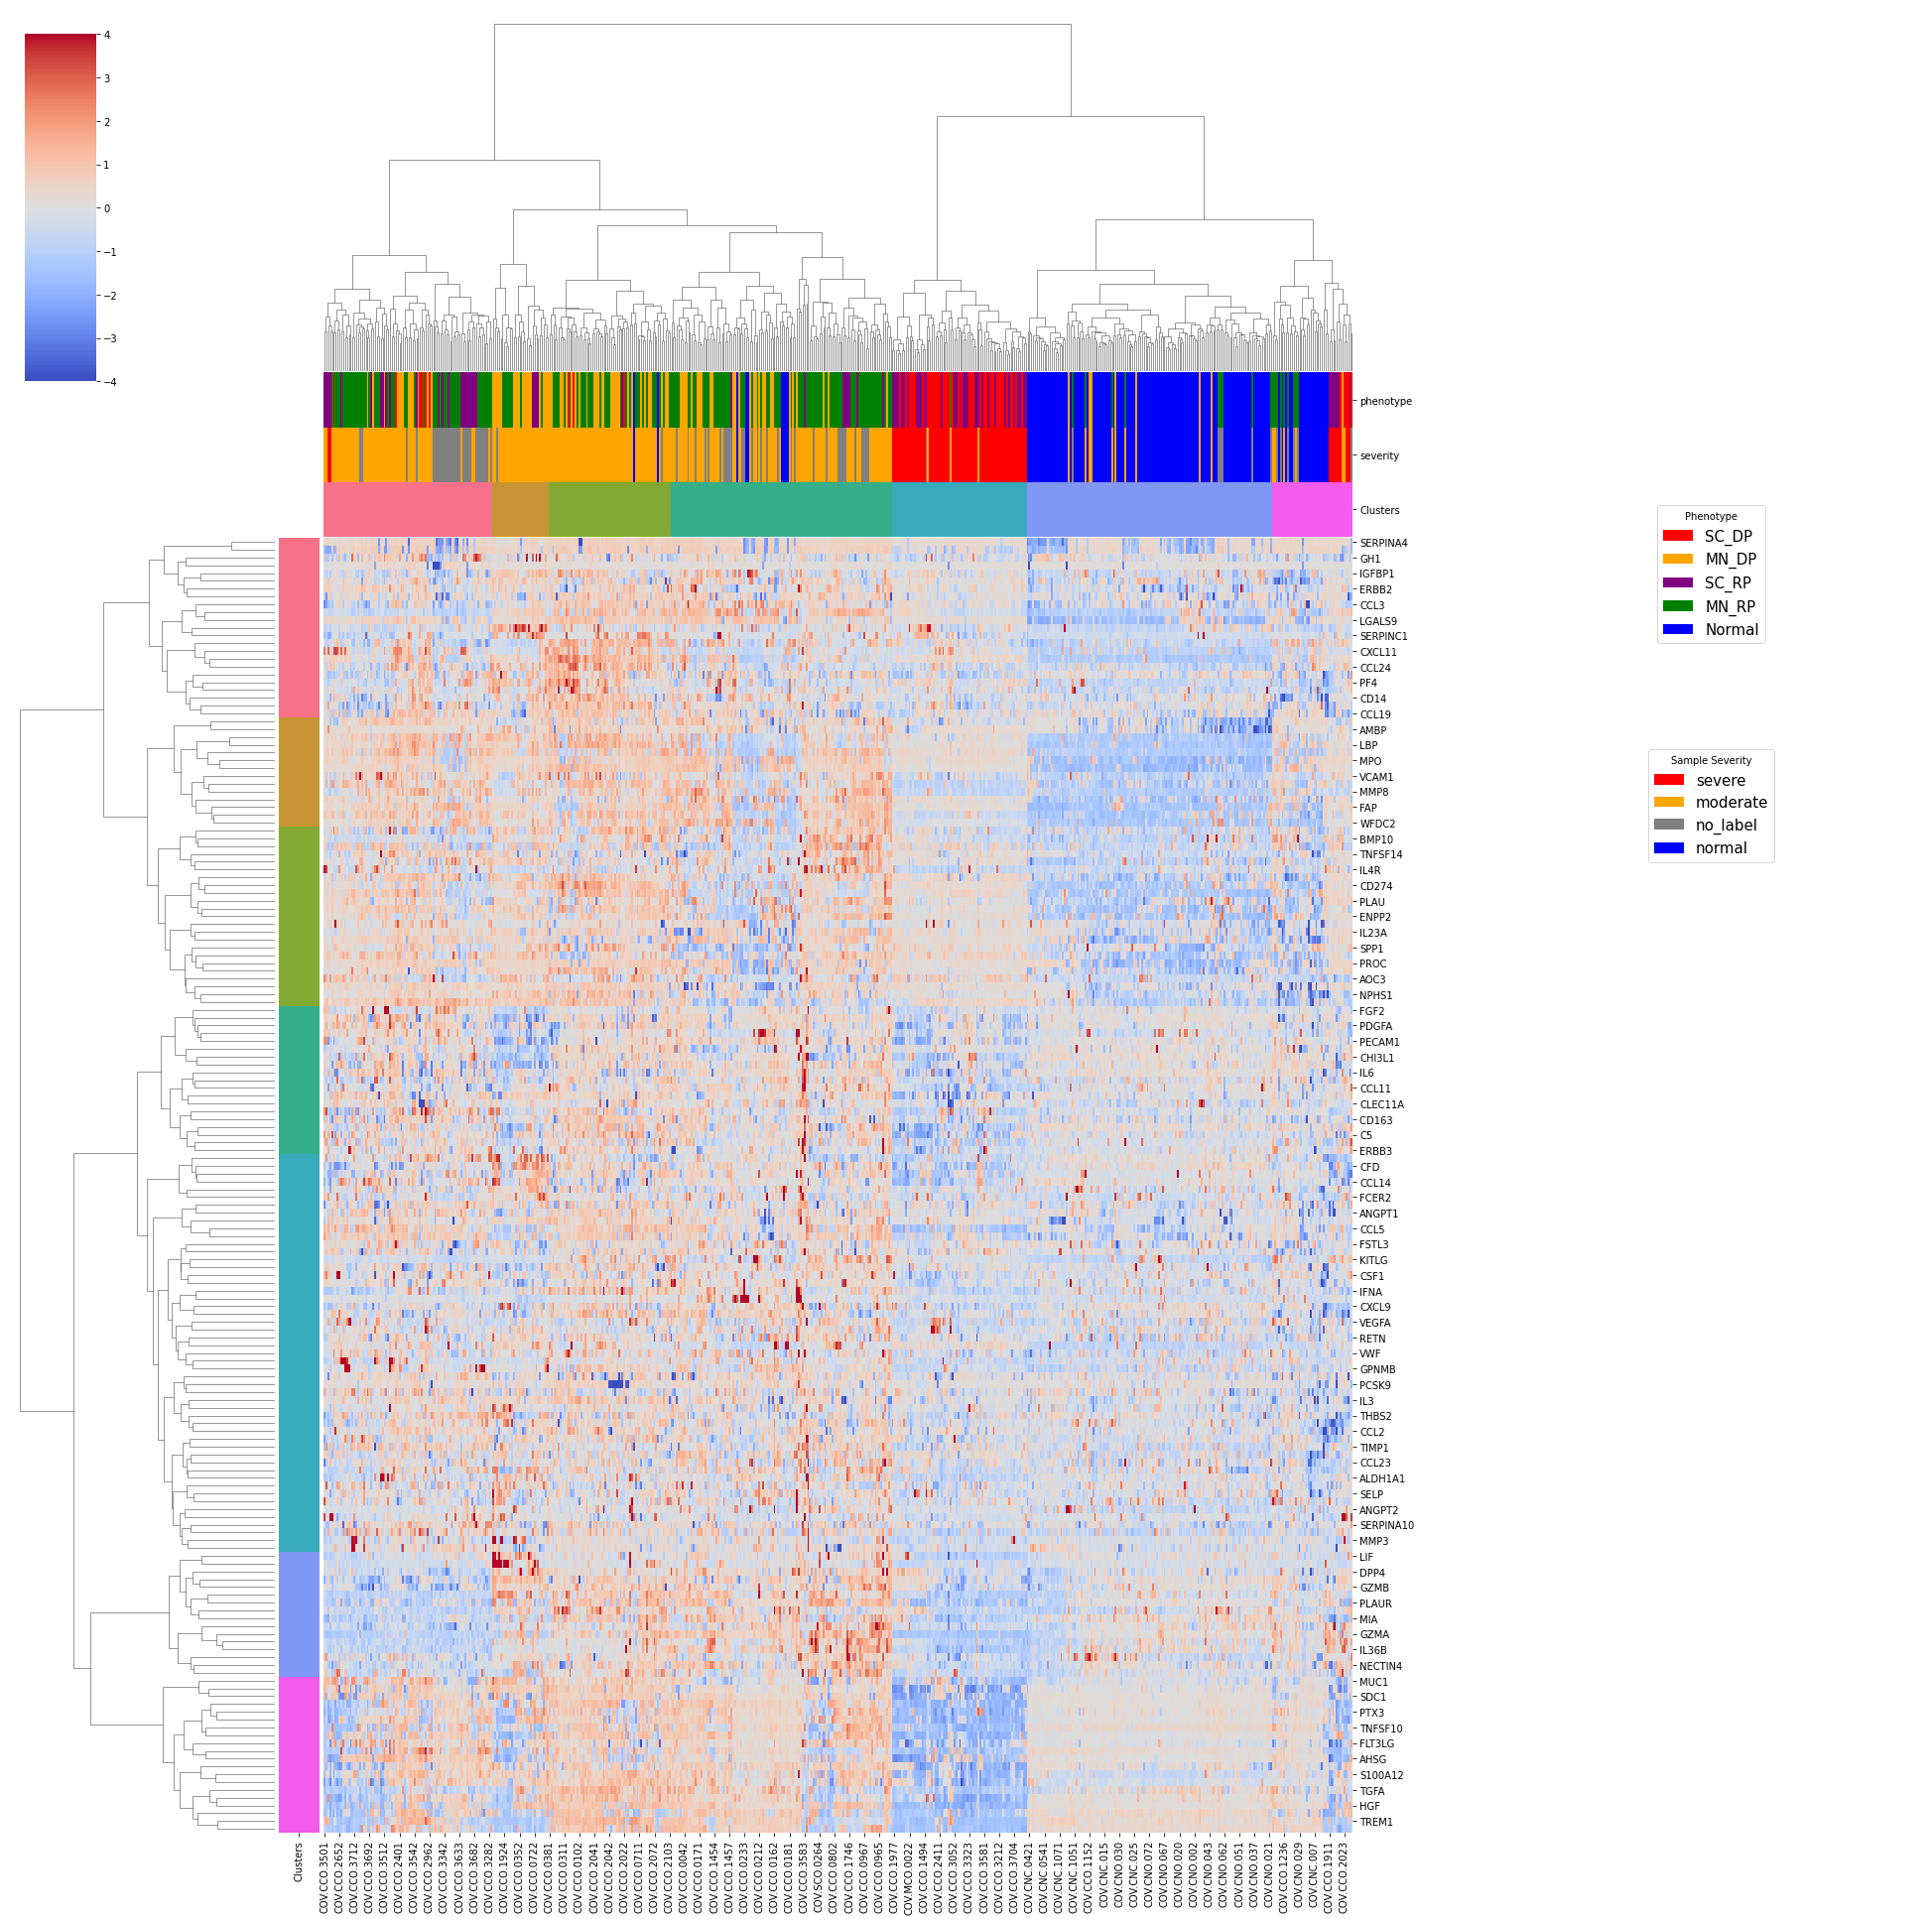

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# Sample data (assuming it's stored in a dataframe called 'df')
label_colors_1 = {
    'Normal': 'white',
    'Patient': 'black',
    # ... add more labels and colors as needed
}
label_colors_2 = {
   
    'SC_DP': 'red',
    'MN_DP': 'orange',
    'SC_RP': 'purple',
    'MN_RP': 'green',
    'Normal': 'blue'
    # ... add more labels and colors as needed for the second category
}
label_colors_3 = {
   
    'severe': 'red',
    'moderate': 'orange',
    'no_label': 'grey',
    'normal':'blue'
    # ... add more labels and colors as needed for the second category
}
label_colors_4 = {
    'DP' :'red',
    'RP' : 'blue',
    'no_label':'grey'
}

# palette_18 = sns.color_palette("tab20",11)
# palette_compare = sns.color_palette('tab20',4)
# unique_compare = set(clusters_compare)
# color_mapping_compare = dict(zip(unique_compare,palette_compare))
# unique_values = set(sev_specific['DB_clusters'])
# color_mapping = dict(zip(unique_values, palette_18))
# col_colors_4 = sev_specific['DB_clusters'].map(color_mapping)
# compare_series = pd.Series(clusters_compare,index = df_compare.index)
# col_colors_compare = compare_series.map(color_mapping_compare)
cluster_colors = sns.color_palette("husl", k)
row_colors = [cluster_colors[label-1] for label in row_cluster_labels]
cluster_colors2 = sns.color_palette("husl", k)
col_colors_ff = [cluster_colors2[label-1] for label in col_cluster_labels]
row_colcol = pd.DataFrame({'Clusters': row_colors},index = g1g.index)
col_colcol = pd.DataFrame({'Clusters': col_colors_ff}, index = g1g.columns)

col_colors_1 = all_sev_prob.pheno_fi.map(label_colors_2)
col_colors_2 = all_sev_prob['Severity'].map(label_colors_1)
col_colors_3 = all_sev_prob['who'].map(label_colors_3)
# col_colors_4 = all_sev_prob['phenotype2'].map(label_colors_4)
# col_colors = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3, 'DB_SCAN':col_colors_4})
col_colors = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3})
col_colors = pd.concat([col_colors,col_colcol],axis = 1)
# col_colors_c = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3, 'DB_SCAN':col_colors_compare})

legend_elements_1 = [Patch(facecolor=color, label=label) for label, color in label_colors_1.items()]
legend_elements_2 = [Patch(facecolor=color, label=label) for label, color in label_colors_2.items()]
legend_elements_3 = [Patch(facecolor=color, label=label) for label, color in label_colors_3.items()]
# legend_elements_4 = [Patch(facecolor=color, label=label) for label, color in color_mapping.items()]
# legend_element_compare = [Patch(facecolor=color,label=label)for label,color in color_mapping_compare.items()]
# Create custom axes for legends
g= sns.clustermap(sh11.T, cmap='coolwarm', figsize=(20, 27), col_colors=col_colors,row_colors=row_colcol, z_score = 0,vmin=-4,vmax=4, method = 'ward')

legend_ax_2 = g.fig.add_axes([1.05, 0.60, 0.3, 0.2])
legend_ax_3 = g.fig.add_axes([1.05, 0.48, 0.3, 0.2])
# legend_ax_4 = g.fig.add_axes([1.05, 0.33, 0.3, 0.2])

# Add legends to the custom axes


legend_ax_2.legend(handles=legend_elements_2, title="Phenotype", loc="center", fontsize = 15)
legend_ax_2.axis('off')  # Turn off the axis

legend_ax_3.legend(handles=legend_elements_3, title="Sample Severity", loc="center", fontsize = 15)
legend_ax_3.axis('off')  # Turn off the axis

# legend_ax_4.legend(handles=legend_elements_4, title="DB SCAN", loc="center", fontsize = 15)
# legend_ax_4.axis('off')  # Turn off the axis


# l3l = []
# for i in l2l:
#     l3l.append(list(g.data2d.index).index(i))
# for pos in l3l:
#     g.ax_heatmap.axhline(pos, color='red', lw=2)

plt.show()

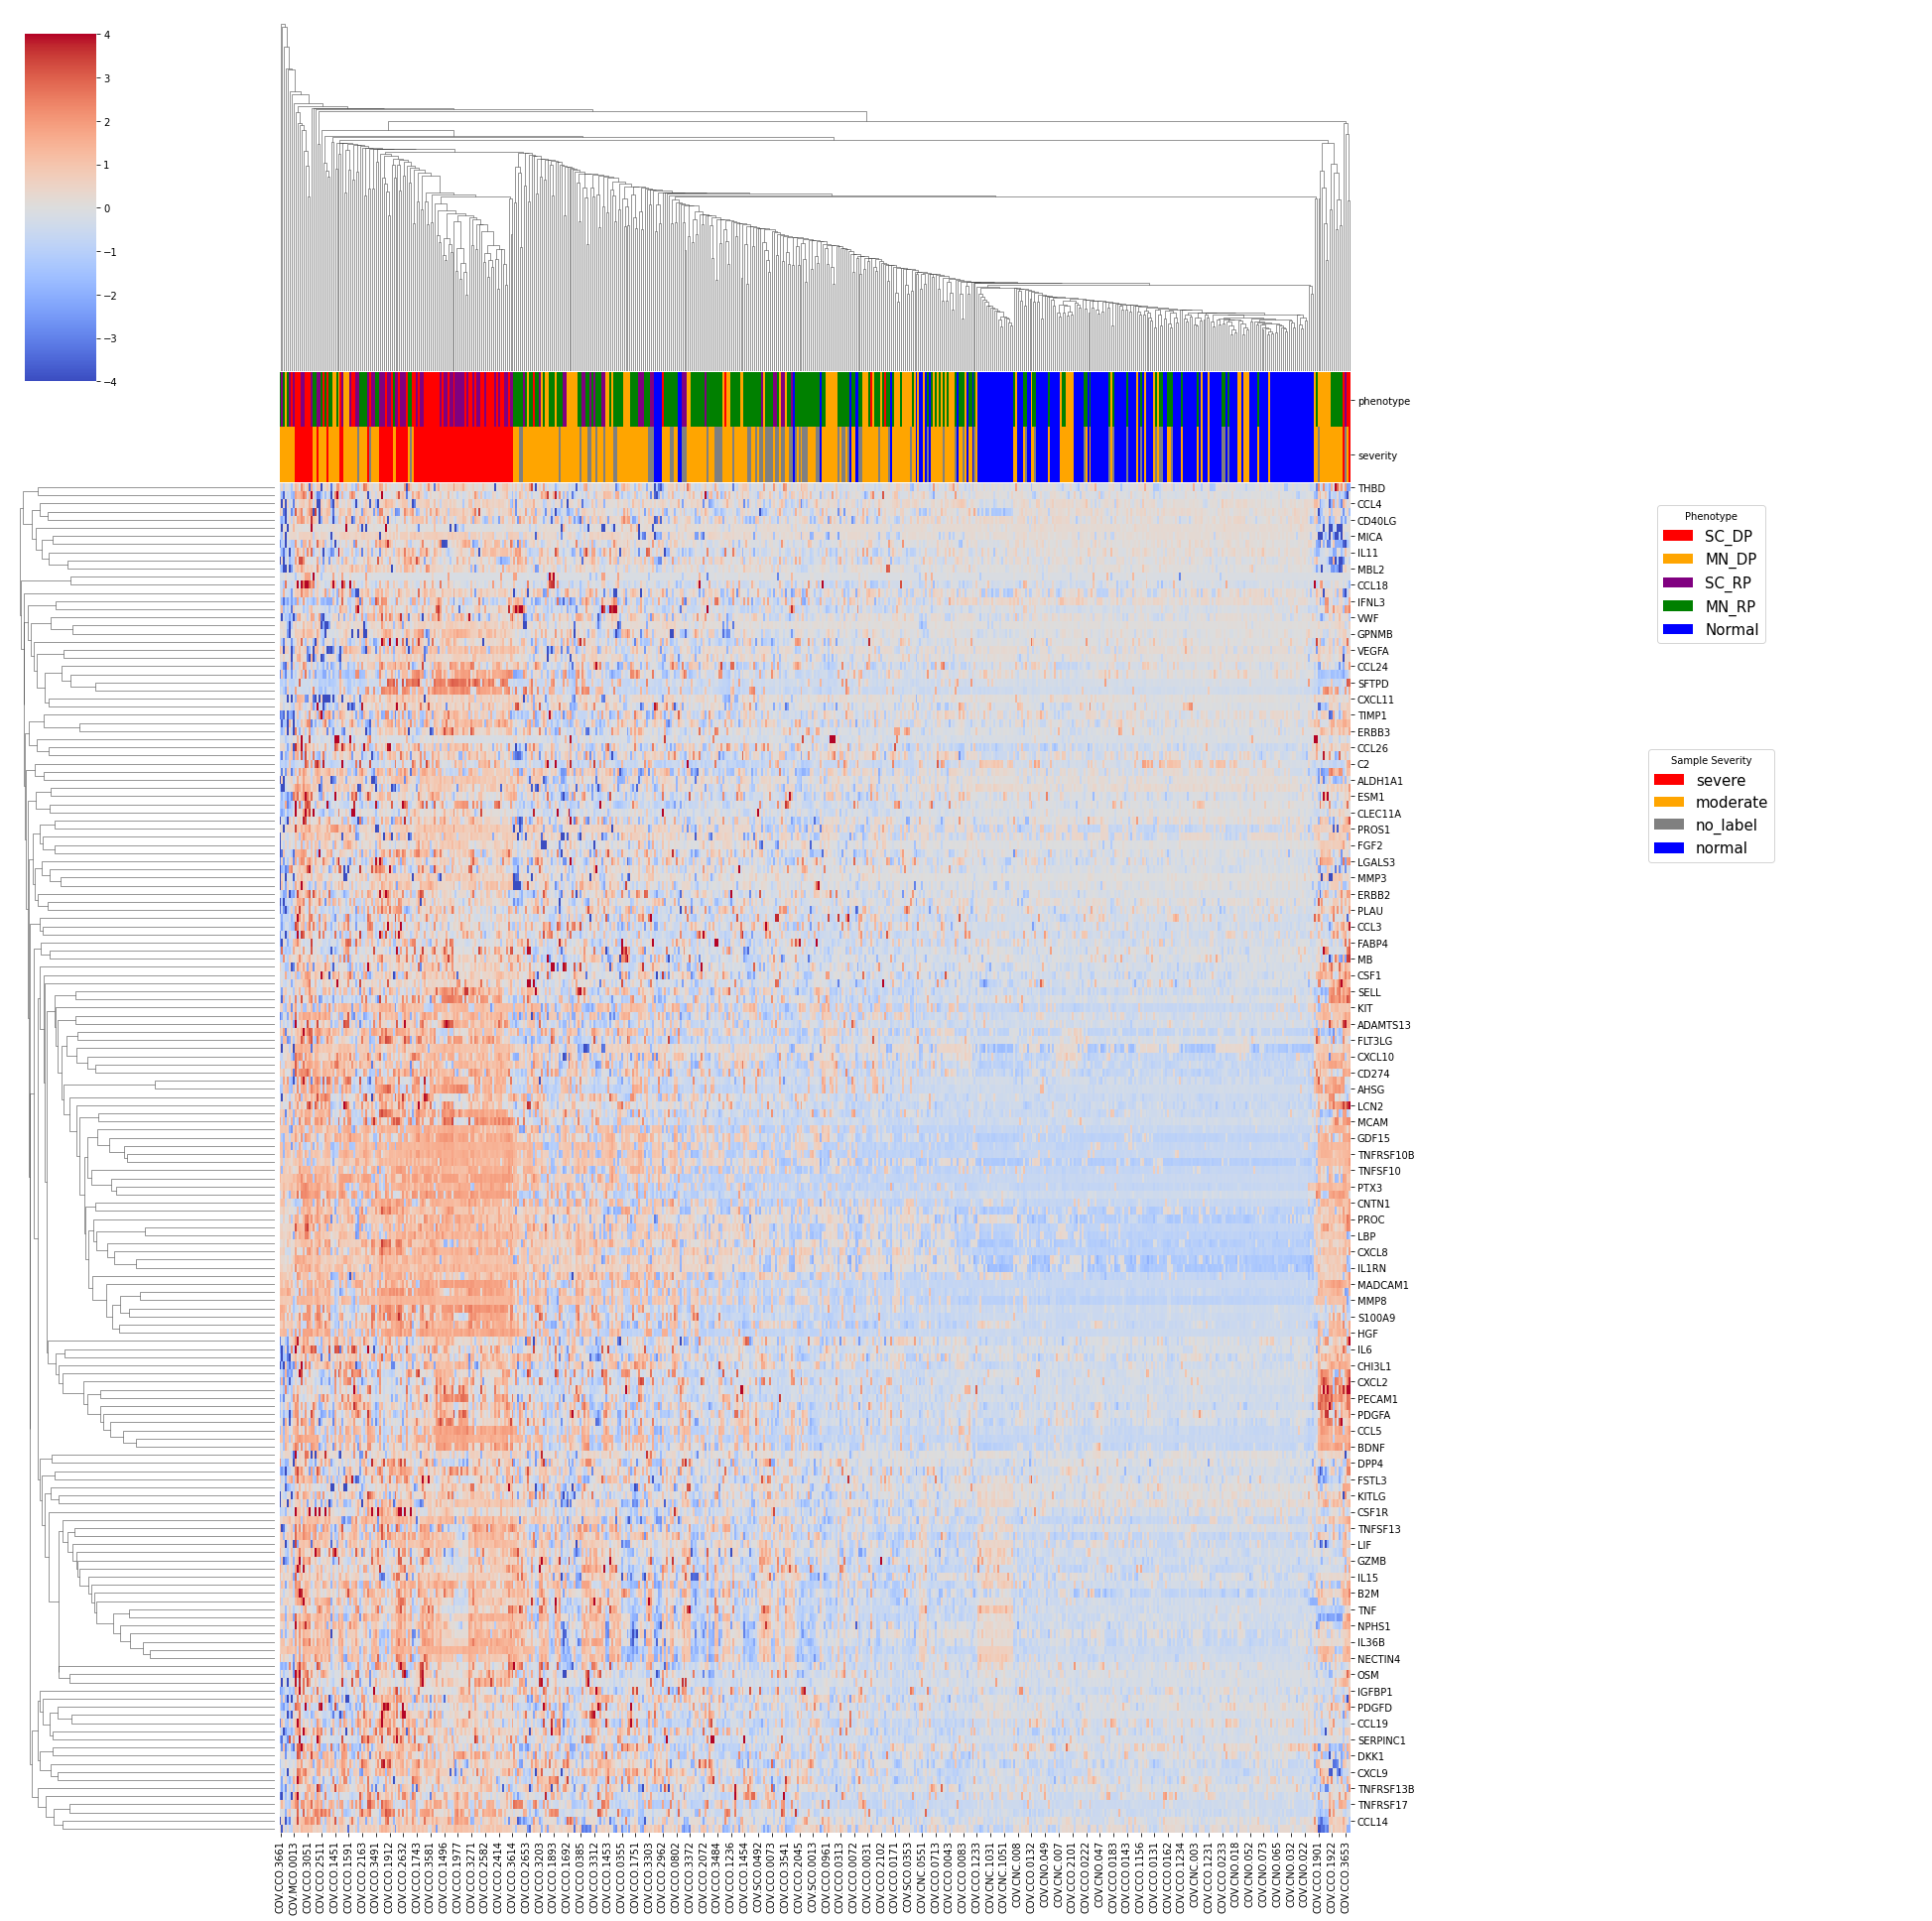

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# Sample data (assuming it's stored in a dataframe called 'df')
label_colors_1 = {
    'Normal': 'white',
    'Patient': 'black',
    # ... add more labels and colors as needed
}
label_colors_2 = {
   
    'SC_DP': 'red',
    'MN_DP': 'orange',
    'SC_RP': 'purple',
    'MN_RP': 'green',
    'Normal': 'blue'
    # ... add more labels and colors as needed for the second category
}
label_colors_3 = {
   
    'severe': 'red',
    'moderate': 'orange',
    'no_label': 'grey',
    'normal':'blue'
    # ... add more labels and colors as needed for the second category
}
label_colors_4 = {
    'DP' :'red',
    'RP' : 'blue',
    'no_label':'grey'
}

# palette_18 = sns.color_palette("tab20",11)
# palette_compare = sns.color_palette('tab20',4)
# unique_compare = set(clusters_compare)
# color_mapping_compare = dict(zip(unique_compare,palette_compare))
# unique_values = set(sev_specific['DB_clusters'])
# color_mapping = dict(zip(unique_values, palette_18))
# col_colors_4 = sev_specific['DB_clusters'].map(color_mapping)
# compare_series = pd.Series(clusters_compare,index = df_compare.index)
# col_colors_compare = compare_series.map(color_mapping_compare)


col_colors_1 = all_sev_prob.pheno_fi.map(label_colors_2)
col_colors_2 = all_sev_prob['Severity'].map(label_colors_1)
col_colors_3 = all_sev_prob['who'].map(label_colors_3)
# col_colors_4 = all_sev_prob['phenotype2'].map(label_colors_4)
# col_colors = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3, 'DB_SCAN':col_colors_4})
col_colors = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3})

# col_colors_c = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3, 'DB_SCAN':col_colors_compare})

legend_elements_1 = [Patch(facecolor=color, label=label) for label, color in label_colors_1.items()]
legend_elements_2 = [Patch(facecolor=color, label=label) for label, color in label_colors_2.items()]
legend_elements_3 = [Patch(facecolor=color, label=label) for label, color in label_colors_3.items()]
# legend_elements_4 = [Patch(facecolor=color, label=label) for label, color in color_mapping.items()]
# legend_element_compare = [Patch(facecolor=color,label=label)for label,color in color_mapping_compare.items()]
# Create custom axes for legends
g= sns.clustermap(sh22.T, cmap='coolwarm', figsize=(20, 27), col_colors=col_colors, z_score = 0,vmin=-4,vmax=4)

legend_ax_2 = g.fig.add_axes([1.05, 0.60, 0.3, 0.2])
legend_ax_3 = g.fig.add_axes([1.05, 0.48, 0.3, 0.2])
# legend_ax_4 = g.fig.add_axes([1.05, 0.33, 0.3, 0.2])

# Add legends to the custom axes


legend_ax_2.legend(handles=legend_elements_2, title="Phenotype", loc="center", fontsize = 15)
legend_ax_2.axis('off')  # Turn off the axis

legend_ax_3.legend(handles=legend_elements_3, title="Sample Severity", loc="center", fontsize = 15)
legend_ax_3.axis('off')  # Turn off the axis

# legend_ax_4.legend(handles=legend_elements_4, title="DB SCAN", loc="center", fontsize = 15)
# legend_ax_4.axis('off')  # Turn off the axis


# l3l = []
# for i in l2l:
#     l3l.append(list(g.data2d.index).index(i))
# for pos in l3l:
#     g.ax_heatmap.axhline(pos, color='red', lw=2)

plt.show()

In [93]:
for i in sh22:
    if (list(sh22[i]).count(0)) == 549:
        print(i)


AHSG


In [94]:
sh22 = sh22.drop('AHSG', axis = 1)

In [95]:
sh22

CXCL9       LIF    CXCL11      IL25     IL12B      IL10  \
COV.CNO.001  -0.000458 -0.000297  0.000152 -0.000967 -0.001610 -0.000056   
COV.CNO.002  -0.001415 -0.000322  0.000482 -0.000994 -0.001402  0.000067   
COV.CNO.003  -0.000922 -0.000832  0.000883 -0.000995 -0.001487  0.000112   
COV.CNO.004  -0.001003 -0.000273  0.000475 -0.002453 -0.001387 -0.000073   
COV.CNO.005  -0.001382 -0.000822  0.001311 -0.000982 -0.002718  0.000013   
...                ...       ...       ...       ...       ...       ...   
COV.CNC.1151 -0.000301 -0.000204  0.000646 -0.001467 -0.001985 -0.000031   
COV.CNC.1171 -0.000542 -0.000036  0.000545 -0.000337 -0.000250 -0.000008   
COV.CNC.1191 -0.000565  0.000006  0.000784 -0.001430 -0.000406 -0.000578   
COV.CNC.1211  0.001260  0.000041  0.000835  0.001043  0.000503  0.000059   
COV.CNC.1231  0.001363  0.008964 -0.000723 -0.000503  0.000548  0.000098   

                  IL13      IL11      IL15      PTX3  ...     FURIN     FSTL3  \
COV.CNO.001   0.000860  0.000636  0.000111 -0.011483  ... -0.000349 -0.000331   
COV.CNO.002  -0.000137  0.002329  0.000187 -0.013859  ... -0.000083 -0.000519   
COV.CNO.003   0.000236  0.000986  0.000108 -0.013450  ... -0.000033 -0.000211   
COV.CNO.004  -0.000197  0.000609  0.000161 -0.011771  ... -0.000371  0.000022   
COV.CNO.005   0.000054  0.001126  0.000532 -0.013371  ... -0.000349 -0.000584   
...                ...       ...       ...       ...  ...       ...       ...   
COV.CNC.1151  0.002658  0.000686  0.000036 -0.010423  ... -0.000025  0.000066   
COV.CNC.1171  0.002637  0.000355  0.000042 -0.008717  ...  0.000067  0.000921   
COV.CNC.1191  0.006173 -0.000342 -0.000154 -0.010480  ...  0.000022  0.000182   
COV.CNC.1211  0.003334  0.000592  0.000086 -0.014798  ... -0.000008 -0.000210   
COV.CNC.1231  0.004271  0.000732  0.000098 -0.015997  ... -0.000263  0.000245   

                FLT3LG       FAP     FABP4        F3          ESM1     ERBB3  \
COV.CNO.001  -0.005132 -0.004965 -0.000518  0.004651 -3.785008e-04 -0.000395   
COV.CNO.002  -0.001709 -0.006682 -0.000403  0.003934 -4.566515e-04 -0.000304   
COV.CNO.003  -0.001145 -0.003823 -0.000290  0.000298 -2.640194e-04 -0.000347   
COV.CNO.004  -0.001273 -0.004112 -0.000354  0.000371  7.527758e-07 -0.000616   
COV.CNO.005  -0.002153 -0.004418 -0.000017 -0.000763 -5.250565e-04 -0.000365   
...                ...       ...       ...       ...           ...       ...   
COV.CNC.1151 -0.002804 -0.006536 -0.000837  0.000711 -2.230845e-04 -0.000381   
COV.CNC.1171 -0.001682 -0.006626 -0.000311  0.000010 -4.267565e-04 -0.000398   
COV.CNC.1191 -0.006862 -0.006582 -0.000295  0.000057 -2.410468e-04 -0.000449   
COV.CNC.1211 -0.003029 -0.013753 -0.000206  0.000359  9.586391e-05 -0.000260   
COV.CNC.1231 -0.001453 -0.008666 -0.000341 -0.001045 -8.532807e-04 -0.000464   

                 ENPP2     WFDC2  
COV.CNO.001  -0.000119  0.004287  
COV.CNO.002  -0.004967 -0.003165  
COV.CNO.003  -0.001205 -0.006216  
COV.CNO.004  -0.000942 -0.002719  
COV.CNO.005  -0.001233  0.005311  
...                ...       ...  
COV.CNC.1151 -0.000321 -0.004107  
COV.CNC.1171 -0.001636 -0.007851  
COV.CNC.1191 -0.001550 -0.007969  
COV.CNC.1211 -0.002520 -0.006175  
COV.CNC.1231 -0.002264 -0.009214  

[549 rows x 165 columns]

In [67]:
sh111 = sh11[~sh11.index.str.contains('CN')]

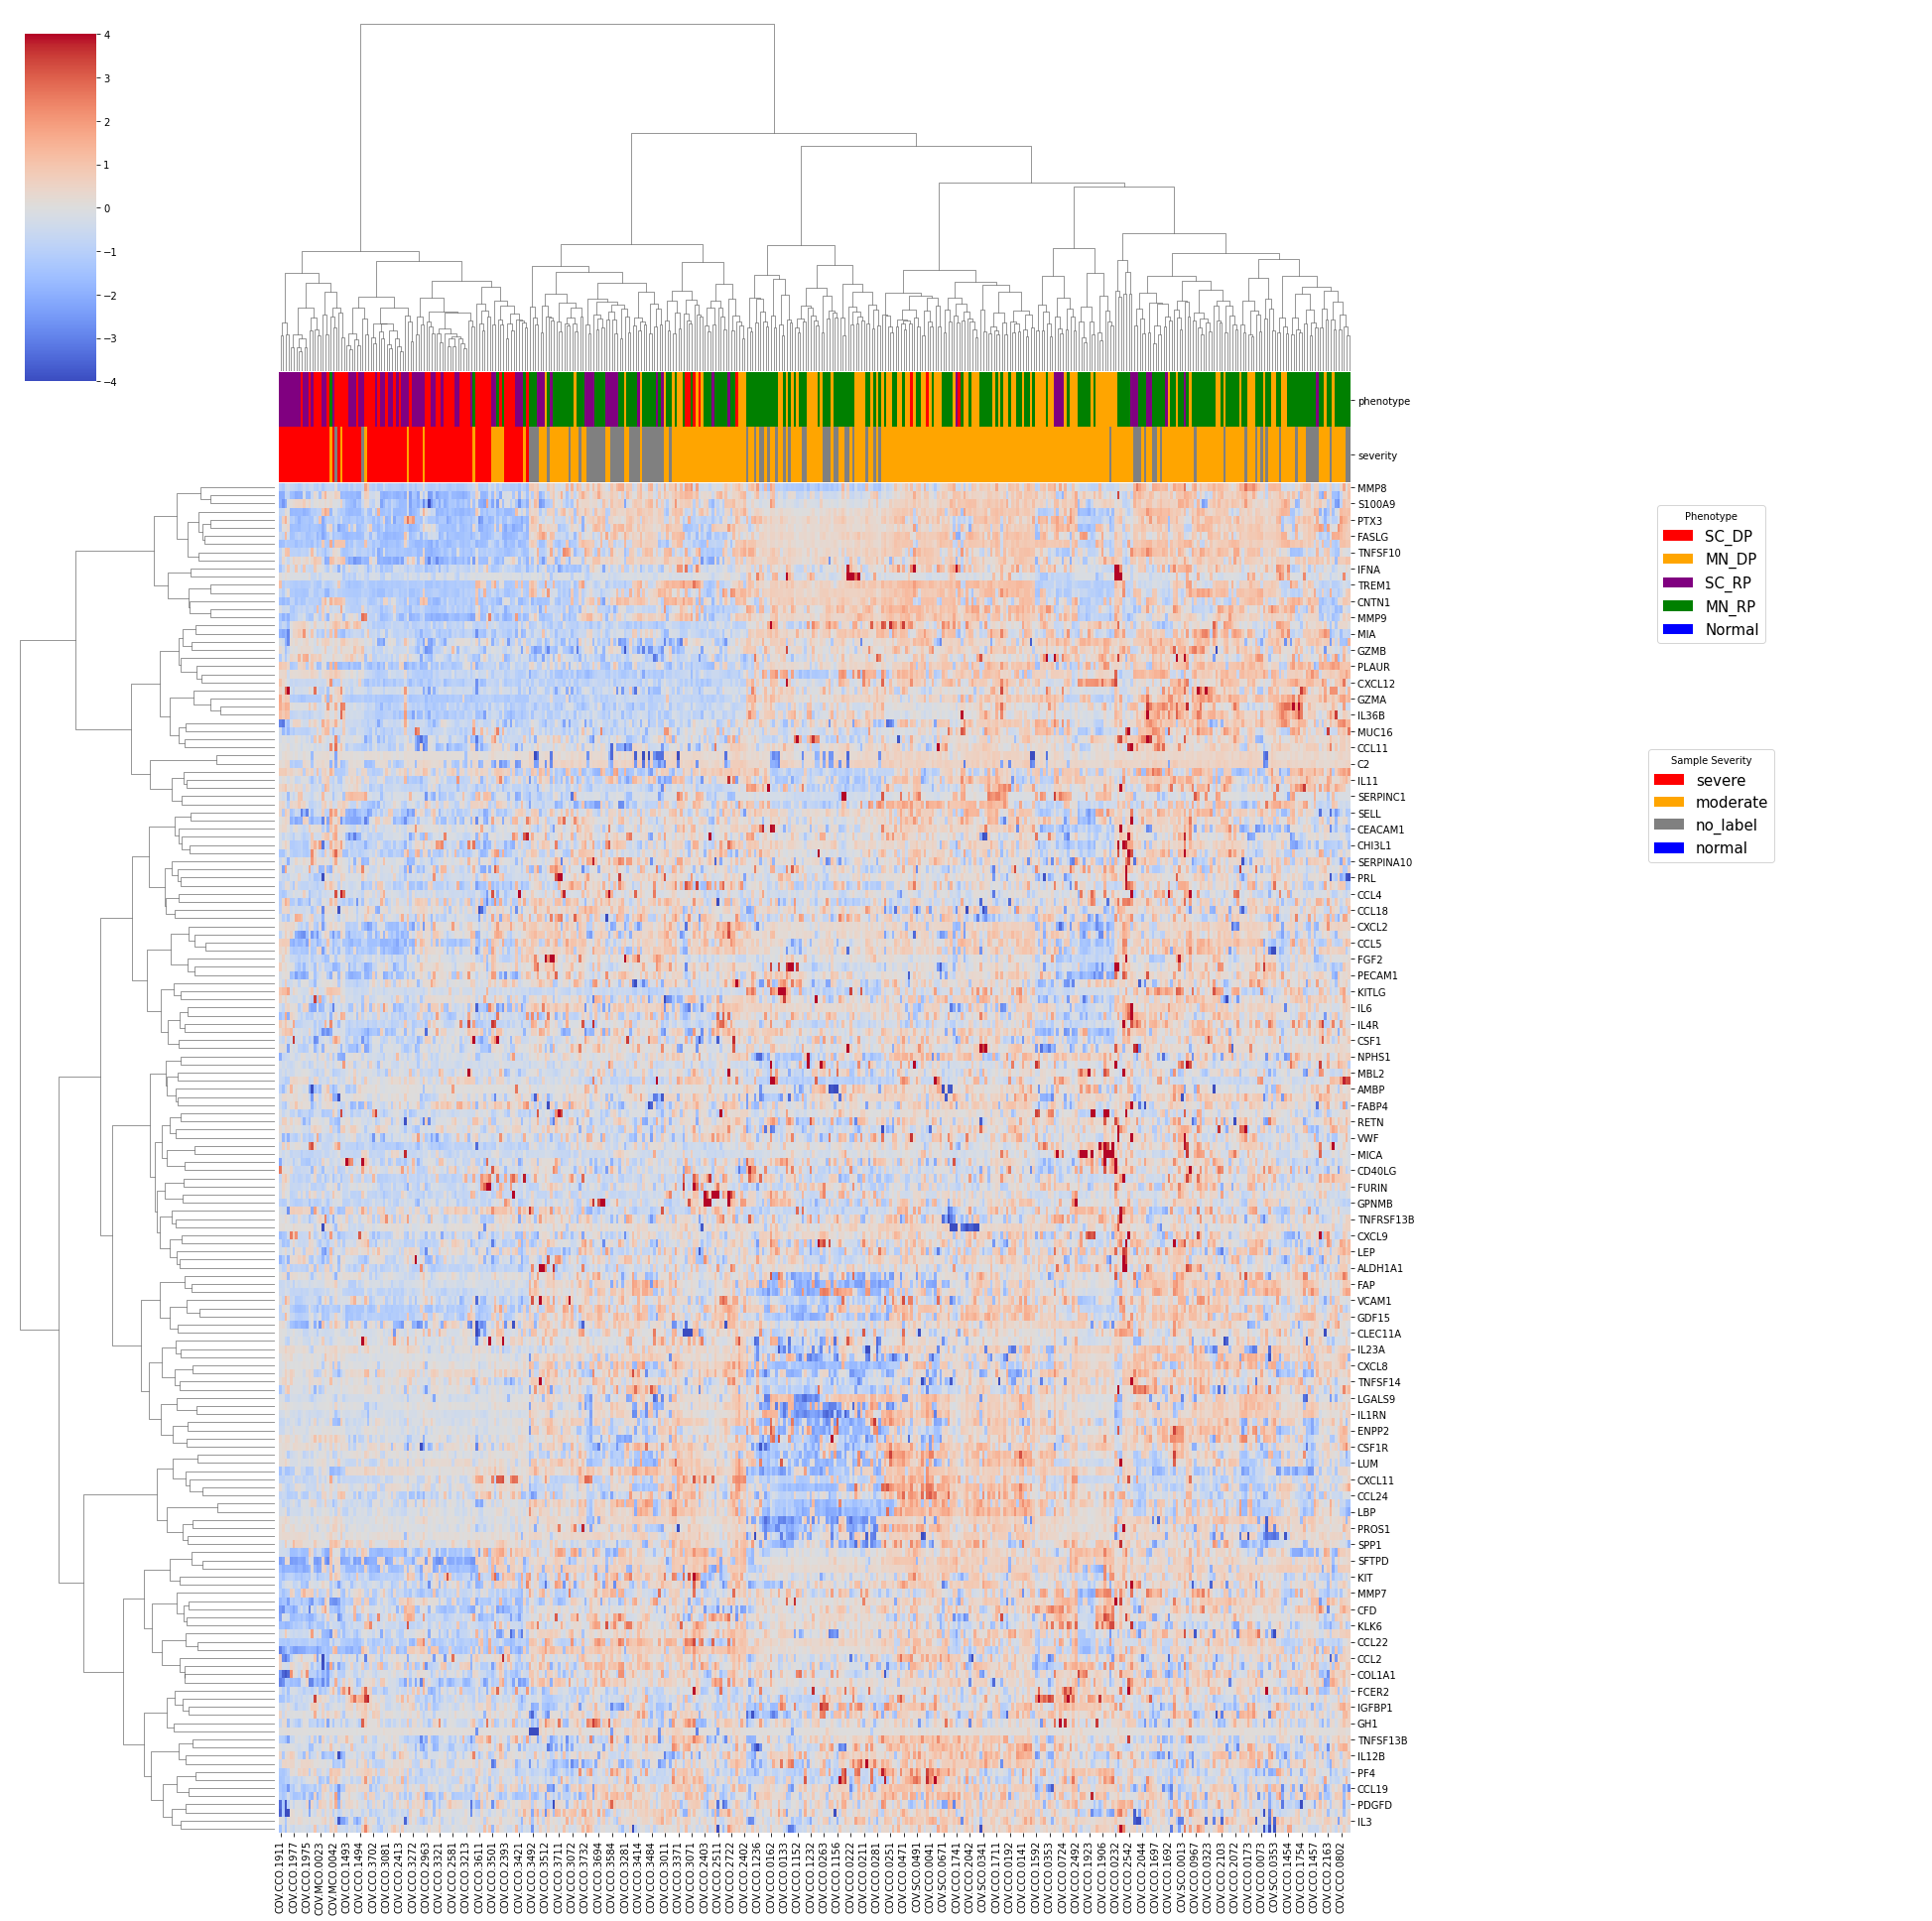

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# Sample data (assuming it's stored in a dataframe called 'df')
label_colors_1 = {
    'Normal': 'white',
    'Patient': 'black',
    # ... add more labels and colors as needed
}
label_colors_2 = {
   
    'SC_DP': 'red',
    'MN_DP': 'orange',
    'SC_RP': 'purple',
    'MN_RP': 'green',
    'Normal': 'blue'
    # ... add more labels and colors as needed for the second category
}
label_colors_3 = {
   
    'severe': 'red',
    'moderate': 'orange',
    'no_label': 'grey',
    'normal':'blue'
    # ... add more labels and colors as needed for the second category
}
label_colors_4 = {
    'DP' :'red',
    'RP' : 'blue',
    'no_label':'grey'
}

# palette_18 = sns.color_palette("tab20",11)
# palette_compare = sns.color_palette('tab20',4)
# unique_compare = set(clusters_compare)
# color_mapping_compare = dict(zip(unique_compare,palette_compare))
# unique_values = set(sev_specific['DB_clusters'])
# color_mapping = dict(zip(unique_values, palette_18))
# col_colors_4 = sev_specific['DB_clusters'].map(color_mapping)
# compare_series = pd.Series(clusters_compare,index = df_compare.index)
# col_colors_compare = compare_series.map(color_mapping_compare)


col_colors_1 = all_sev_prob.pheno_fi.map(label_colors_2)
col_colors_2 = all_sev_prob['Severity'].map(label_colors_1)
col_colors_3 = all_sev_prob['who'].map(label_colors_3)
# col_colors_4 = all_sev_prob['phenotype2'].map(label_colors_4)
# col_colors = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3, 'DB_SCAN':col_colors_4})
col_colors = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3})

# col_colors_c = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3, 'DB_SCAN':col_colors_compare})

legend_elements_1 = [Patch(facecolor=color, label=label) for label, color in label_colors_1.items()]
legend_elements_2 = [Patch(facecolor=color, label=label) for label, color in label_colors_2.items()]
legend_elements_3 = [Patch(facecolor=color, label=label) for label, color in label_colors_3.items()]
# legend_elements_4 = [Patch(facecolor=color, label=label) for label, color in color_mapping.items()]
# legend_element_compare = [Patch(facecolor=color,label=label)for label,color in color_mapping_compare.items()]
# Create custom axes for legends
g= sns.clustermap(sh111.T, cmap='coolwarm', figsize=(20, 27), col_colors=col_colors, z_score = 0,vmin=-4,vmax=4, method = 'ward')

legend_ax_2 = g.fig.add_axes([1.05, 0.60, 0.3, 0.2])
legend_ax_3 = g.fig.add_axes([1.05, 0.48, 0.3, 0.2])
# legend_ax_4 = g.fig.add_axes([1.05, 0.33, 0.3, 0.2])

# Add legends to the custom axes


legend_ax_2.legend(handles=legend_elements_2, title="Phenotype", loc="center", fontsize = 15)
legend_ax_2.axis('off')  # Turn off the axis

legend_ax_3.legend(handles=legend_elements_3, title="Sample Severity", loc="center", fontsize = 15)
legend_ax_3.axis('off')  # Turn off the axis

# legend_ax_4.legend(handles=legend_elements_4, title="DB SCAN", loc="center", fontsize = 15)
# legend_ax_4.axis('off')  # Turn off the axis


# l3l = []
# for i in l2l:
#     l3l.append(list(g.data2d.index).index(i))
# for pos in l3l:
#     g.ax_heatmap.axhline(pos, color='red', lw=2)

plt.show()

In [69]:
sh121 = cyt_norm[cyt_norm.index.isin(sh111.index)]

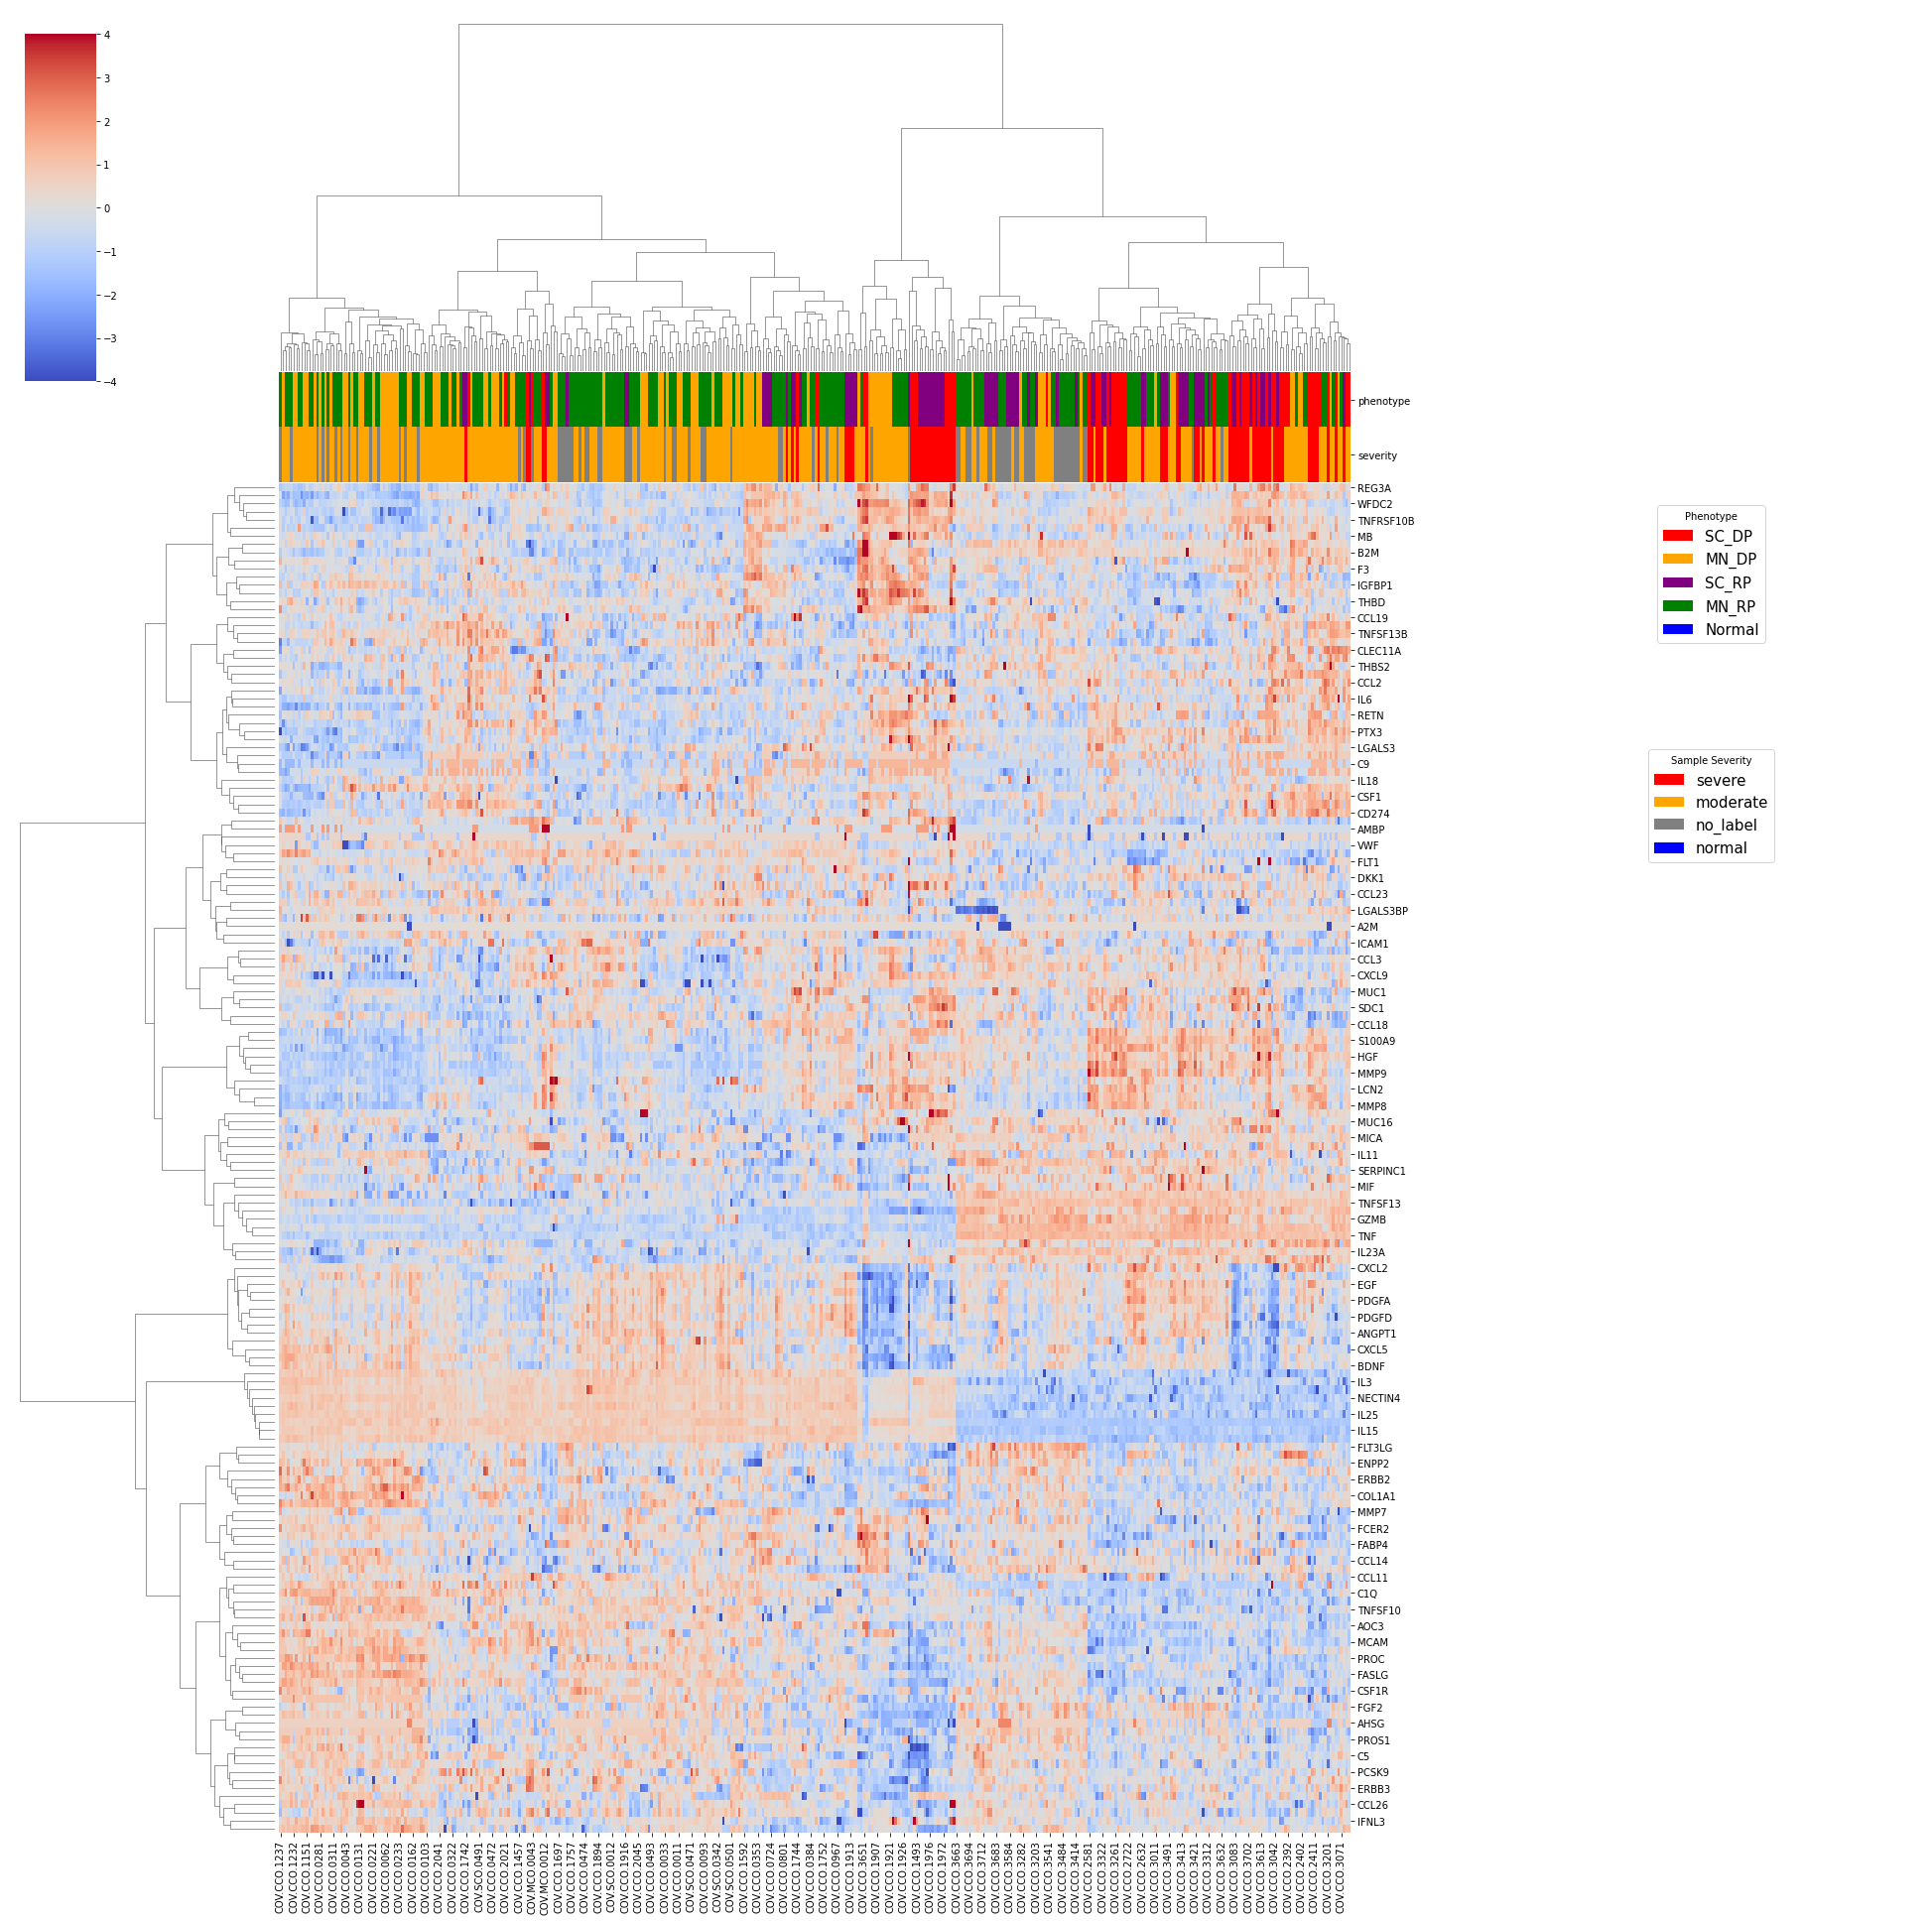

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# Sample data (assuming it's stored in a dataframe called 'df')
label_colors_1 = {
    'Normal': 'white',
    'Patient': 'black',
    # ... add more labels and colors as needed
}
label_colors_2 = {
   
    'SC_DP': 'red',
    'MN_DP': 'orange',
    'SC_RP': 'purple',
    'MN_RP': 'green',
    'Normal': 'blue'
    # ... add more labels and colors as needed for the second category
}
label_colors_3 = {
   
    'severe': 'red',
    'moderate': 'orange',
    'no_label': 'grey',
    'normal':'blue'
    # ... add more labels and colors as needed for the second category
}
label_colors_4 = {
    'DP' :'red',
    'RP' : 'blue',
    'no_label':'grey'
}

# palette_18 = sns.color_palette("tab20",11)
# palette_compare = sns.color_palette('tab20',4)
# unique_compare = set(clusters_compare)
# color_mapping_compare = dict(zip(unique_compare,palette_compare))
# unique_values = set(sev_specific['DB_clusters'])
# color_mapping = dict(zip(unique_values, palette_18))
# col_colors_4 = sev_specific['DB_clusters'].map(color_mapping)
# compare_series = pd.Series(clusters_compare,index = df_compare.index)
# col_colors_compare = compare_series.map(color_mapping_compare)


col_colors_1 = all_sev_prob.pheno_fi.map(label_colors_2)
col_colors_2 = all_sev_prob['Severity'].map(label_colors_1)
col_colors_3 = all_sev_prob['who'].map(label_colors_3)
# col_colors_4 = all_sev_prob['phenotype2'].map(label_colors_4)
# col_colors = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3, 'DB_SCAN':col_colors_4})
col_colors = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3})

# col_colors_c = pd.DataFrame({'phenotype': col_colors_1,'severity':col_colors_3, 'DB_SCAN':col_colors_compare})

legend_elements_1 = [Patch(facecolor=color, label=label) for label, color in label_colors_1.items()]
legend_elements_2 = [Patch(facecolor=color, label=label) for label, color in label_colors_2.items()]
legend_elements_3 = [Patch(facecolor=color, label=label) for label, color in label_colors_3.items()]
# legend_elements_4 = [Patch(facecolor=color, label=label) for label, color in color_mapping.items()]
# legend_element_compare = [Patch(facecolor=color,label=label)for label,color in color_mapping_compare.items()]
# Create custom axes for legends
g= sns.clustermap(sh121.T, cmap='coolwarm', figsize=(20, 27), col_colors=col_colors, z_score = 0,vmin=-4,vmax=4, method = 'ward')

legend_ax_2 = g.fig.add_axes([1.05, 0.60, 0.3, 0.2])
legend_ax_3 = g.fig.add_axes([1.05, 0.48, 0.3, 0.2])
# legend_ax_4 = g.fig.add_axes([1.05, 0.33, 0.3, 0.2])

# Add legends to the custom axes


legend_ax_2.legend(handles=legend_elements_2, title="Phenotype", loc="center", fontsize = 15)
legend_ax_2.axis('off')  # Turn off the axis

legend_ax_3.legend(handles=legend_elements_3, title="Sample Severity", loc="center", fontsize = 15)
legend_ax_3.axis('off')  # Turn off the axis

# legend_ax_4.legend(handles=legend_elements_4, title="DB SCAN", loc="center", fontsize = 15)
# legend_ax_4.axis('off')  # Turn off the axis


# l3l = []
# for i in l2l:
#     l3l.append(list(g.data2d.index).index(i))
# for pos in l3l:
#     g.ax_heatmap.axhline(pos, color='red', lw=2)

plt.show()

In [109]:
sh111

CXCL9       LIF    CXCL11      IL25     IL12B      IL10  \
COV.CCO.0011  0.002565 -0.001304 -0.001848  0.001586 -0.000520 -0.000375   
COV.CCO.0012  0.000225 -0.000245 -0.001775  0.001037 -0.000688  0.000397   
COV.CCO.0013 -0.000482 -0.001067 -0.001324  0.001098  0.000566 -0.001978   
COV.CCO.0021  0.000743 -0.001183 -0.001404  0.000197  0.005716  0.001872   
COV.CCO.0022 -0.000308 -0.001304 -0.001840  0.000900  0.005566  0.000983   
...                ...       ...       ...       ...       ...       ...   
COV.CCO.3713  0.000961 -0.000095 -0.006103 -0.003883 -0.001052  0.001036   
COV.CCO.3731  0.000013 -0.000019  0.013765 -0.002027 -0.002418  0.002627   
COV.CCO.3732  0.001856  0.000829  0.023332 -0.001714 -0.000417  0.001744   
COV.CCO.3733 -0.000767  0.000727  0.013901 -0.003764 -0.000753  0.000903   
COV.CCO.3734 -0.001438  0.000981  0.016724 -0.007617 -0.000722  0.000298   

                  IL13      IL11      IL15      PTX3  ...     FURIN     FSTL3  \
COV.CCO.0011 -0.000117 -0.009346 -0.003073  0.002484  ...  0.002455  0.000264   
COV.CCO.0012  0.010718  0.001718  0.000565 -0.001804  ...  0.002309  0.001349   
COV.CCO.0013  0.004920 -0.001497  0.001992  0.004986  ...  0.000372  0.000351   
COV.CCO.0021  0.007175 -0.000003 -0.002730  0.001254  ... -0.001167 -0.000490   
COV.CCO.0022  0.012051 -0.008463 -0.000254 -0.001829  ...  0.001675  0.000087   
...                ...       ...       ...       ...  ...       ...       ...   
COV.CCO.3713 -0.012529 -0.005667 -0.002815  0.008273  ... -0.000739  0.000277   
COV.CCO.3731 -0.004769 -0.001709  0.001677 -0.012909  ... -0.000856  0.000417   
COV.CCO.3732 -0.020149 -0.005022 -0.000772  0.000529  ... -0.001674 -0.003041   
COV.CCO.3733 -0.011529 -0.004861 -0.003052  0.003702  ...  0.007584  0.000024   
COV.CCO.3734 -0.015170 -0.003193 -0.000628  0.000701  ...  0.000174 -0.000453   

                FLT3LG       FAP     FABP4        F3      ESM1     ERBB3  \
COV.CCO.0011  0.002912  0.010818  0.005132 -0.002042  0.000631 -0.000351   
COV.CCO.0012  0.002761  0.011450  0.005932  0.004731  0.000764 -0.001225   
COV.CCO.0013 -0.000136  0.005093  0.001260 -0.000205 -0.001338 -0.000618   
COV.CCO.0021  0.004318  0.006000  0.003043 -0.000989  0.000332  0.000328   
COV.CCO.0022  0.002280  0.006932 -0.000964 -0.003736  0.000516  0.000739   
...                ...       ...       ...       ...       ...       ...   
COV.CCO.3713  0.003031  0.015544 -0.001970 -0.004255 -0.000622 -0.000370   
COV.CCO.3731 -0.005224 -0.007475  0.004838 -0.005304  0.000427  0.000716   
COV.CCO.3732  0.001080  0.004494  0.000220 -0.008041  0.000310  0.000523   
COV.CCO.3733  0.005717  0.010888 -0.001067 -0.006978  0.000037  0.001161   
COV.CCO.3734  0.000585  0.005754 -0.001630 -0.009855  0.001158  0.000856   

                 ENPP2     WFDC2  
COV.CCO.0011  0.004475  0.005122  
COV.CCO.0012  0.002115  0.025357  
COV.CCO.0013  0.002524  0.034589  
COV.CCO.0021  0.004224  0.024609  
COV.CCO.0022 -0.010588  0.009465  
...                ...       ...  
COV.CCO.3713 -0.004621  0.021815  
COV.CCO.3731  0.001270  0.003089  
COV.CCO.3732  0.000839  0.020675  
COV.CCO.3733  0.002097  0.025891  
COV.CCO.3734 -0.006979  0.019290  

[404 rows x 166 columns]